In [ ]:
import tensorflow as tf

if not tf.config.list_physical_devices('GPU'):
    print("Using CPU only.")
else:
    print("GPU is still enabled.")

Using CPU only.


### **Disable Debugger Validation and Ignore Warnings**

In [ ]:
# disable debugger file validation
# helps avoid debugger-related crashes & suppresses warnings during execution
import os
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

# ignore Python warnings globally
%env PYTHONWARNINGS="ignore"

env: PYTHONWARNINGS="ignore"


### **Mount Google Drive**

In [ ]:
# mount drive to access files (req2.txt) on drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Check, Install, and Import Libraries**
### **Create** requirements.txt to list all proj dependencies
Only need to include external libraries/packages in the requirements2.txt that are not part of Python's standard library

In [ ]:
import os
import sys        # find current Python executable path, when run pip commands, uses same Python environment tht notebook is running on
import subprocess
import importlib  # detect missing libraries from required_libraries list, prevents unnecessary reinstallation of already-installed libraries

# list of required libraries
required_libraries = ["openai", "requests", "tqdm", "pandas", "numpy", "langid", "langdetect", "textblob", "nltk", "deep_translator",
                      "contractions", "symspellpy", "streamlit", "pyngrok", "python-dotenv"]

missing_libraries = []
for lib in required_libraries:
    try:
      importlib.import_module(lib)
    except ImportError:
      missing_libraries.append(lib)

# if any library missing, install from requirements2.txt
# list 3rd-party libraries in text file
if missing_libraries:
    requirements_path = "/content/drive/MyDrive/Colab Notebooks/requirements2.txt"

    if os.path.exists(requirements_path):
        print(f"Installing missing libraries: {', '.join(missing_libraries)}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", *missing_libraries])
        print("Libraries installed from requirements2.txt")
    else:
        print(f"Error: requirements2.txt not found at {requirements_path}")
else:
    print("All libraries are already installed.")

# import libraries
try:
    import openai, requests, tqdm, pandas, numpy, langid, langdetect, textblob, nltk, deep_translator, contractions, symspellpy, streamlit, pyngrok
    from dotenv import load_dotenv
    print("Libraries imported successfully.")
except ImportError as e:
    print(f"Error importing libraries: {e}")

Installing missing libraries: langid, langdetect, deep_translator, contractions, symspellpy, streamlit, pyngrok, python-dotenv
Libraries installed from requirements2.txt
Libraries imported successfully.


### **Exploratory Data Analysis (EDA)**
Since got multiple cleaning challenges, perform EDA initially to understand general characteristics of dataset (check dataset size, inspect column names, check for missing values, check star rating distribution & check sentiment label distribution)

### Visualize balance between positive & negative sentiment

5000


Index(['star_rating', 'review_body', 'star_rating_label'], dtype='object')

Missing values:
star_rating          0
review_body          0
star_rating_label    0


star_rating
5    2450
4     876
1     874
3     454
2     346


star_rating_label
positive    3326
negative    1674






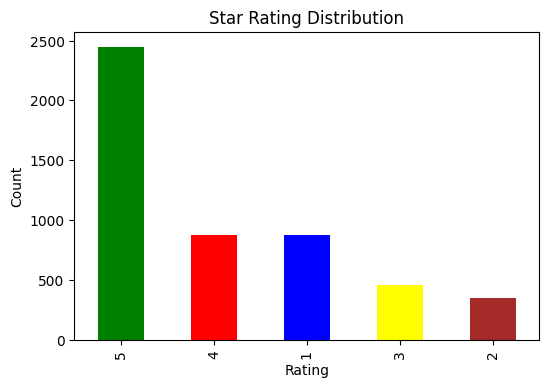

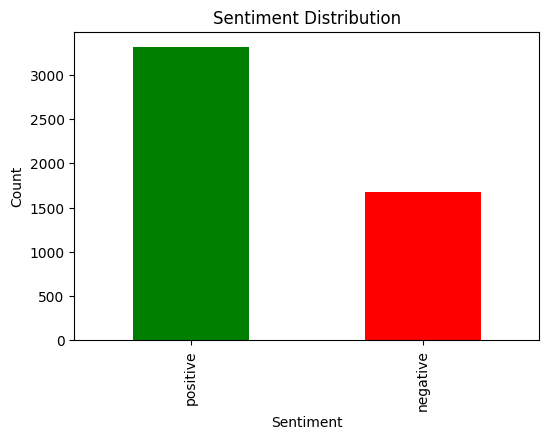

6319

In [ ]:
# 5000 data
import pandas as pd
import matplotlib.pyplot as plt
import gc

gc.collect()

df_sample = pd.read_csv("/content/drive/MyDrive/amazon_mobile_electronics.csv", usecols=['review_body', 'star_rating', 'star_rating_label'],
                 encoding="ISO-8859-1")

# take first 5000 rows
df_sample.reset_index(drop=True, inplace=True)
df_sample = pd.concat([
    df_sample.iloc[0:2006],
    df_sample.iloc[2141:5135]
], axis=0)

pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 1000)        # set display width

print(len(df_sample))                       # total number of rows in sample
print("\n")
print(df_sample.columns)
print("\nMissing values:")             # column names
print(df_sample.isnull().sum().to_string()) # check missing values
print("\n")
print(df_sample['star_rating'].value_counts().to_string())   # show star rating distribution
print("\n")
print(df_sample['star_rating_label'].value_counts().to_string())
print("\n")

# visualize star rating
print("\n")
plt.figure(figsize=(6, 4))   # adjust figure size
df_sample['star_rating'].value_counts().plot(kind='bar', color=['green', 'red', 'blue', 'yellow', 'brown'])
plt.title("Star Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()
plt.close()

# visualize sentiment
plt.figure(figsize=(6, 4))   # adjust figure size
df_sample['star_rating_label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
plt.close()      # free up memory

del df_sample
gc.collect()

1000


Index(['star_rating', 'review_body', 'star_rating_label'], dtype='object')

Missing values:
star_rating          0
review_body          0
star_rating_label    0


star_rating
5    491
1    186
4    173
3     83
2     67


star_rating_label
positive    664
negative    336






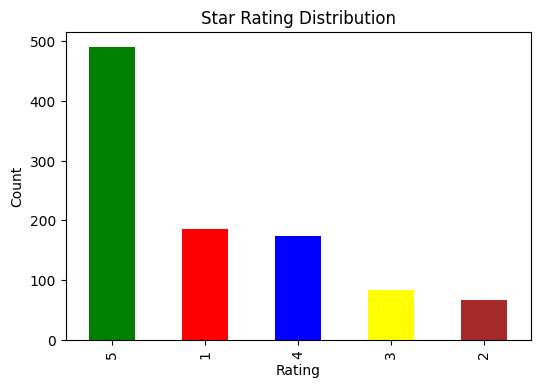

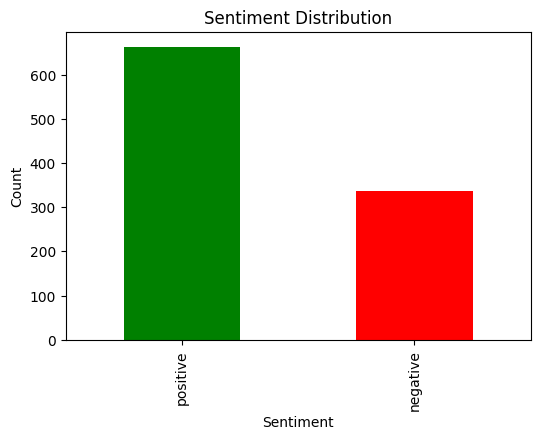

6301

In [ ]:
# 1000 data
import pandas as pd
import matplotlib.pyplot as plt
import gc

gc.collect()

df = pd.read_csv("/content/drive/MyDrive/amazon_mobile_electronics.csv", usecols=['review_body', 'star_rating', 'star_rating_label'],
                 encoding="ISO-8859-1")

# take first 5000 rows
df_sample = df.iloc[:1000]

pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 1000)        # set display width

print(len(df_sample))                       # total number of rows in sample
print("\n")
print(df_sample.columns)
print("\nMissing values:")             # column names
print(df_sample.isnull().sum().to_string()) # check missing values
print("\n")
print(df_sample['star_rating'].value_counts().to_string())   # show star rating distribution
print("\n")
print(df_sample['star_rating_label'].value_counts().to_string())
print("\n")

# visualize star rating
print("\n")
plt.figure(figsize=(6, 4))   # adjust figure size
df_sample['star_rating'].value_counts().plot(kind='bar', color=['green', 'red', 'blue', 'yellow', 'brown'])
plt.title("Star Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()
plt.close()

# visualize sentiment
plt.figure(figsize=(6, 4))   # adjust figure size
df_sample['star_rating_label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
plt.close()      # free up memory

del df
gc.collect()

### **Visualize frequent keywords using word cloud**
To identify irrelevant words/symbols (e.g., "the", "and", or symbols), then can decide which words to remove in preprocessing

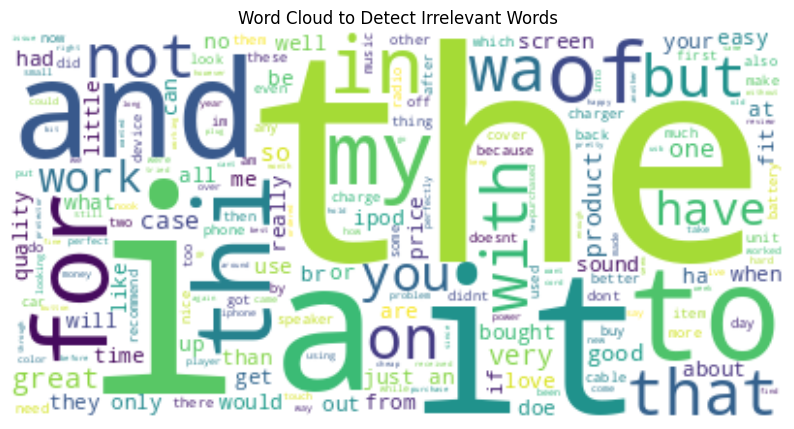

Top 20 Frequent Words (Including Irrelevant Ones):
the: 12497
i: 7608
it: 7338
and: 6427
to: 5958
a: 5551
is: 4086
this: 3730
for: 3455
my: 3121
of: 2690
in: 2351
with: 2122
was: 2108
that: 2050
not: 2044
on: 1980
but: 1895
you: 1689
have: 1638


2564

In [ ]:
# 5000 data
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re
import gc

# load dataset
df = pd.read_csv("/content/drive/MyDrive/amazon_mobile_electronics.csv")
df_sample = df.iloc[:5000]

# combine all text from review column
text = " ".join(str(review_body) for review_body in df_sample['review_body'] if pd.notnull(review_body))

# basic cleanup (remove special characters, numbers) for better visualization
clean_text = re.sub(r'[^a-zA-Z\s]', '', text)  # only keep letters & spaces
clean_text = clean_text.lower()                # convert to lowercase

# include stopwords in word cloud
custom_stopwords = set()

# generate word cloud using cleaned text
word_cloud = WordCloud(
    collocations=False,
    background_color='white',
    stopwords=custom_stopwords   # no stopwords removed
).generate(clean_text)

# display word cloud
plt.figure(figsize=(10, 6))   # adjust size of word cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud to Detect Irrelevant Words")
plt.show()

# extract word frequencies
words = clean_text.split()
word_freq = Counter(words)

# show top 20 most frequent words (inclu. potential irrelevant ones)
common_words = word_freq.most_common(20)
print("Top 20 Frequent Words (Including Irrelevant Ones):")
for word, freq in common_words:
    print(f"{word}: {freq}")

del df
gc.collect()   # free up memory after generating word cloud, which can consume significant RAM

### **Load and preview dataset**

In [ ]:
print(df_sample.head(15))   # preview first 15 rows

    customer_id                                      product_title  star_rating                                        review_body  product_id star_rating_label
0      28471074  Sprint Universal Folding Portable Mini Stereo ...            5  Item was as discribed ; was shipped fast and f...  B005BHGZ6A          positive
1       1958232  iXCC Lightning Cable 3ft, iPhone charger, for ...            5                   Came in perfect. Works perfectly  B00J46XO9U          positive
2      49126521        Sennheiser HMEC 250 NoiseGard Pilot Headset            2  Good quality, came with out the extra boom mic...  B003JW0C7C          negative
3      46531276  M-Edge Touring Sleeve for Kindle (Fits 6" Disp...            5  I do not like reading my Kindle in a case so t...  B002GXCQ3S          positive
4       4487344  iPod Touch 5th 6th Generation Case MyTurtle TM...            5  The case came 3 days after I ordered it. It fi...  B00TGI0EUI          positive
5      32141833  GSI Quality Water

## **Data Preprocessing**

## **Basic Text Cleaning**

### **Remove irrelevant reviews entirely or partially**

In [ ]:
# 5000 data
import re
import os
import gc
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = "/content/drive/MyDrive"
original_file = os.path.join(script_dir, "amazon_mobile_electronics.csv")
updated_file = os.path.join(script_dir, "ame_updated_dataset.csv")
removed_irrelevant_file = os.path.join(script_dir, "ame_removed_irrelevant.csv")

df_sample = pd.read_csv(original_file, usecols=['review_body', 'star_rating', 'star_rating_label'], encoding="utf-8")
# reset index, .iloc will be position-based
df_sample.reset_index(drop=True, inplace=True)
# select only rows with desired indices
df_subset = pd.concat([
    df_sample.iloc[0:2006],     # 1 - 2005
    df_sample.iloc[2141:5135],  # 2142 - 5134
], axis=0)

# confirm size
print("Total rows:", len(df_subset))

def remove_irrelevant(review):
  if not isinstance(review, str):   # make sure it's a string
    return review
  review = re.sub(r'\b(i\s+ordered\s+and\s+received\s+the\s+unit\s+in\s+\w+\s+\d{4})\b', '', review, flags=re.IGNORECASE)
  review = re.sub(r'\bnot a bass blocking ca\b', '', review, flags=re.IGNORECASE)
  review = re.sub(r'\bthe first philips unit this one we received was g\b', '', review, flags=re.IGNORECASE)
  review = re.sub(r"that's hard to describe see the videos others have posted a note on some of the", '', review, flags=re.IGNORECASE)
  review = re.sub(r'Do yourself a favour and\s*\S*$', '', review, flags=re.IGNORECASE)
  review = re.sub(r'^\s*asin\s+[a-zA-Z0-9]+\b.*?(?=\bThe\b|\bThis\b|\bI\b|$)', '', review, flags=re.IGNORECASE)   # 347th: remove asin
  review = re.sub(r'\b(?:blah\s*){2,}\b', '', review, flags=re.IGNORECASE)
  review = re.sub(r'Gdshvcchbcxhkng', '', review, flags=re.IGNORECASE)  # 1308th
  review = re.sub(r'Earl R.Lobley', '', review, flags=re.IGNORECASE)
  review = re.sub(r'fow wos wodd wsnmd', '', review, flags=re.IGNORECASE)  # 2772th
  review = re.sub(r'\s+', ' ', review).strip()   # remove extra spaces after removing
  return review

indices_to_remove = [29, 345, 911, 982, 1150, 1215, 1454, 2279, 2319, 2366, 2815, 2948]     # remove entire review of both indices rows
fully_removed_rows = df_subset.loc[indices_to_remove].copy()

# drop from main dataset
df_subset = df_subset.drop(index=indices_to_remove)
print("Remaining rows after removal:", len(df_subset))

# make a copy of original review_body to compare with
df_subset['original_review'] = df_subset['review_body']
# apply cleaning func
df_subset['review_body'] = df_subset['review_body'].apply(remove_irrelevant)

# keep affected rows only
partially_cleaned_rows = df_subset[df_subset['original_review'] != df_subset['review_body']]
partially_cleaned_rows = partially_cleaned_rows.drop(columns=['original_review'])

# combine both types of affected reviews
removed_irrelevant = pd.concat([fully_removed_rows, partially_cleaned_rows], axis=0)

# save affected rows
removed_irrelevant.to_csv(removed_irrelevant_file, index=True)
print(f"\nRemoved irrelevant reviews saved to: {removed_irrelevant_file}")

print(removed_irrelevant.head())

df_subset = df_subset.drop(columns=['original_review'])
df_subset.to_csv(updated_file, index=True)
print(f"\nUpdated dataset saved to: {updated_file}")

del df_sample, df_subset, removed_irrelevant
_= gc.collect()

Total rows: 5000
Remaining rows after removal: 4988

Removed irrelevant reviews saved to: /content/drive/MyDrive/ame_removed_irrelevant.csv
      star_rating                                                                                              review_body star_rating_label
29              5  [[VIDEOID:mo270XT22GHBDF2]]My review of the medium brown iCuff \\"351\\" Wristband for the iPod Nano 6G          positive
345             1                                                                                       It is only 60GB...          negative
911             5                                                                                             Thank you!!!          positive
982             5                                                                                                       tx          positive
1150            4                                                                                         is as advertised          positive

Updated datas

In [ ]:
# 1000 data

import re
import os
import gc
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = "/content/drive/MyDrive"
original_file = os.path.join(script_dir, "amazon_mobile_electronics.csv")
updated_file = os.path.join(script_dir, "ame_updated_dataset.csv")
removed_irrelevant_file = os.path.join(script_dir, "ame_removed_irrelevant.csv")

df_sample = pd.read_csv(original_file, usecols=['review_body', 'star_rating', 'star_rating_label'], encoding="utf-8")
# reset index, .iloc will be position-based
df_sample.reset_index(drop=True, inplace=True)
# Select only rows with desired indices
df_subset = pd.concat([
    df_sample.iloc[0:1000],     # 0 - 999 = 1000 data
], axis=0)

# Confirm size
print("Total rows:", len(df_subset))  # Should be 5000

def remove_irrelevant(review):
  if not isinstance(review, str):   # make sure it's a string
    return review
  review = re.sub(r'\b(i\s+ordered\s+and\s+received\s+the\s+unit\s+in\s+\w+\s+\d{4})\b', '', review, flags=re.IGNORECASE)
  review = re.sub(r'\bnot a bass blocking ca\b', '', review, flags=re.IGNORECASE)
  review = re.sub(r'\bthe first philips unit this one we received was g\b', '', review, flags=re.IGNORECASE)
  review = re.sub(r"that's hard to describe see the videos others have posted a note on some of the", '', review, flags=re.IGNORECASE)
  review = re.sub(r'Do yourself a favour and\s*\S*$', '', review, flags=re.IGNORECASE)
  review = re.sub(r'^\s*asin\s+[a-zA-Z0-9]+\b.*?(?=\bThe\b|\bThis\b|\bI\b|$)', '', review, flags=re.IGNORECASE)   # 347th: remove asin
  review = re.sub(r'\b(?:blah\s*){2,}\b', '', review, flags=re.IGNORECASE)
  review = re.sub(r'Gdshvcchbcxhkng', '', review, flags=re.IGNORECASE)  # 1308th
  review = re.sub(r'Earl R.Lobley', '', review, flags=re.IGNORECASE)
  review = re.sub(r'fow wos wodd wsnmd', '', review, flags=re.IGNORECASE)  # 2772th
  review = re.sub(r'\s+', ' ', review).strip()   # remove extra spaces after removing
  return review

indices_to_remove = [29, 345, 911, 982]     # remove entire review of both indices rows
fully_removed_rows = df_subset.loc[indices_to_remove].copy()

# drop from main dataset
df_subset = df_subset.drop(index=indices_to_remove)
print("Remaining rows after removal:", len(df_subset))

# make a copy of original review_body to compare with
df_subset['original_review'] = df_subset['review_body']
# apply cleaning func
df_subset['review_body'] = df_subset['review_body'].apply(remove_irrelevant)

# keep affected rows only
partially_cleaned_rows = df_subset[df_subset['original_review'] != df_subset['review_body']]
partially_cleaned_rows = partially_cleaned_rows.drop(columns=['original_review'])

# combine both types of affected reviews
removed_irrelevant = pd.concat([fully_removed_rows, partially_cleaned_rows], axis=0)

# save affected rows
removed_irrelevant.to_csv(removed_irrelevant_file, index=True)
print(f"\nRemoved irrelevant reviews saved to: {removed_irrelevant_file}")

print(removed_irrelevant.head())

df_subset = df_subset.drop(columns=['original_review'])
df_subset.to_csv(updated_file, index=True)
print(f"\nUpdated dataset saved to: {updated_file}")

del df_sample, df_subset, removed_irrelevant
_= gc.collect()

Total rows: 1000
Remaining rows after removal: 996

Removed irrelevant reviews saved to: /content/drive/MyDrive/ame_removed_irrelevant.csv
     star_rating                                                                                                                                                                                                                            review_body star_rating_label
29             5                                                                                                                                [[VIDEOID:mo270XT22GHBDF2]]My review of the medium brown iCuff \\"351\\" Wristband for the iPod Nano 6G          positive
345            1                                                                                                                                                                                                                     It is only 60GB...          negative
911            5                                               

### **Remove HTML entities**

In [ ]:
# 5000 data
# standard library
import re
import os
import html
import gc
# 3rd party library
import pandas as pd

# display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = "/content/drive/MyDrive"
updated_file = os.path.join(script_dir, "ame_updated_dataset.csv")
removed_html_file = os.path.join(script_dir, "ame_removed_html.csv")

df_cleaned = pd.read_csv(updated_file, encoding="utf-8", index_col=0)
print("Rows after irrelevant reviews removal:", len(df_cleaned))

if len(df_cleaned) < 5000:
    df_original = pd.read_csv(original_file, usecols=['review_body', 'star_rating_label'], encoding="utf-8")

    df_remaining = df_original.drop(df_cleaned.index, errors='ignore')
    df_remaining = df_remaining.drop(indices_to_remove, errors='ignore')

    # select exactly how many more rows needed from ori dataset excluding alrdy used ones
    # if needs 12 more rows, will select 12 rows
    needed = 5000 - len(df_cleaned)
    # select 12 more rows
    extra_indices = list(range(5134, 5146 + 1))  # 5135 - 5147
    df_extra = df_original.iloc[extra_indices]
    df_cleaned = pd.concat([df_cleaned, df_extra], axis=0)

    print(f"Added {len(df_extra)} more rows to reach 5000 total.")

# func to clean html entities
def clean_html(review):
    if not isinstance(review, str):  # ensure review is a string
        return review

    # replace <br> with space
    review = re.sub(r'<br\s*/?>?', ' ', review)
    # remove all HTML tags
    review = re.sub(r'<[^>]+>', '', review)

    # decode HTML tags
    review = html.unescape(review)

    # remove escaped characters
    review = re.sub(r'\\"', ' ', review)  # remove \"
    review = re.sub(r'\\', '', review)  # remove backslashes

    # fix spacing before punctuation
    review = re.sub(r'\s+([.,!?;:])', r'\1', review)
    review = re.sub(r'([!?])([^\s!?.,;:])', r'\1 \2', review)

    review = re.sub(r'\s+', ' ', review).strip()  # replace multiple spaces with a single space

    return review

# apply function and store results in a new column
df_cleaned['removed_html_review'] = df_cleaned['review_body'].apply(clean_html)

# filter rows that were actually changed
#df_modified = df_sample.dropna(subset=['cleaned_review']).copy()
df_modified = df_cleaned[df_cleaned['removed_html_review'].notna()].copy()

# if there are modified reviews, update dataset & save
if not df_modified.empty:
    # save only modified reviews to removed_html_file
    df_comparison = df_modified.copy()
    df_comparison['original_review'] = df_modified['review_body']
    df_comparison = df_comparison[['original_review', 'removed_html_review']]
    df_comparison.to_csv(removed_html_file, encoding="utf-8", index=True)
    print(f"\nRemoved HTML entities saved to: {removed_html_file}")

    # show first few modified rows
    print("\nFirst 5 Modified Reviews:")
    print(df_modified[['review_body', 'removed_html_review']].head())

else:
    print("No HTML entities found. No changes were made.")

# reset index
df_cleaned_reset = df_cleaned.reset_index()
df_modified_reset = df_modified.reset_index()

# replace review_body with cleaned reviews
df_cleaned_reset.loc[df_modified_reset.index, 'review_body'] = df_modified_reset['removed_html_review']

# remove temporary column
df_cleaned_reset.drop(columns=['removed_html_review'], inplace=True)

# save with correct index alignment
df_cleaned_reset.to_csv(updated_file, encoding="utf-8", index=True)
print(f"\nUpdated data saved to: {updated_file}")

# free memory after saving
del df_cleaned, df_modified   # delete DataFrame
_ = gc.collect()    # run garbage collection

Rows after irrelevant reviews removal: 4988
Added 13 more rows to reach 5000 total.

Removed HTML entities saved to: /content/drive/MyDrive/ame_removed_html.csv

First 5 Modified Reviews:
                                                                                                                                                                                                                             review_body                                                                                                                                                                                                                    removed_html_review
0                                                                                                                            Item was as discribed ; was shipped fast and function very well . Would do business with again .<br />A++++                                                                                                                    

In [ ]:
# 1000 data
# standard library
import re
import os
import html
import gc
# 3rd party library
import pandas as pd

# display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = "/content/drive/MyDrive"
updated_file = os.path.join(script_dir, "ame_updated_dataset.csv")
removed_html_file = os.path.join(script_dir, "ame_removed_html.csv")

df_cleaned = pd.read_csv(updated_file, encoding="utf-8", index_col=0)
print("Rows after irrelevant reviews removal:", len(df_cleaned))

if len(df_cleaned) < 5000:
    df_original = pd.read_csv(original_file, usecols=['review_body', 'star_rating_label'], encoding="utf-8")

    df_remaining = df_original.drop(df_cleaned.index, errors='ignore')
    df_remaining = df_remaining.drop(indices_to_remove, errors='ignore')

    # select exactly how many more rows needed from ori dataset excluding alrdy used ones
    # if needs 4 more rows, will select 4 rows
    needed = 5000 - len(df_cleaned)
    # select 4 more rows
    extra_indices = list(range(1000, 1003 + 1))  # 1000 - 1003 (1000,1001,1002,1003 total gt 4 data)
    df_extra = df_original.iloc[extra_indices]

    df_cleaned = pd.concat([df_cleaned, df_extra], axis=0)

    print(f"Added {len(df_extra)} more rows to reach 1000 total.")

# func to clean html entities
def clean_html(review):
    if not isinstance(review, str):  # ensure review is a string
        return review

    # replace <br> with space
    review = re.sub(r'<br\s*/?>?', ' ', review)
    # remove all HTML tags
    review = re.sub(r'<[^>]+>', '', review)

    # decode HTML tags
    review = html.unescape(review)

    # remove escaped characters
    review = re.sub(r'\\"', ' ', review)  # remove \"
    review = re.sub(r'\\', '', review)  # remove backslashes

    # fix spacing before punctuation
    review = re.sub(r'\s+([.,!?;:])', r'\1', review)
    review = re.sub(r'([!?])([^\s!?.,;:])', r'\1 \2', review)

    review = re.sub(r'\s+', ' ', review).strip()  # replace multiple spaces with a single space

    return review

# apply function and store results in a new column
df_cleaned['review'] = df_cleaned['review_body'].apply(clean_html)

# filter rows that were actually changed
#df_modified = df_sample.dropna(subset=['cleaned_review']).copy()
df_modified = df_cleaned[df_cleaned['review'].notna()].copy()

# if there are modified reviews, update dataset & save
if not df_modified.empty:
    # save only modified reviews to removed_html_file
    df_comparison = df_modified.copy()
    df_comparison['original_review'] = df_modified['review_body']
    df_comparison = df_comparison[['original_review', 'review']]
    df_comparison.to_csv(removed_html_file, encoding="utf-8", index=True)
    print(f"\nRemoved HTML entities saved to: {removed_html_file}")

    # show first few modified rows
    print("\nFirst 5 Modified Reviews:")
    print(df_modified[['review_body', 'review']].head())

else:
    print("No HTML entities found. No changes were made.")

# reset index
df_cleaned_reset = df_cleaned.reset_index()
df_modified_reset = df_modified.reset_index()

# replace review_body with cleaned reviews
df_cleaned_reset.loc[df_modified_reset.index, 'review_body'] = df_modified_reset['review']

# remove temporary column
df_cleaned_reset.drop(columns=['review'], inplace=True)

# save with correct index alignment
df_cleaned_reset.to_csv(updated_file, encoding="utf-8", index=True)
print(f"\nUpdated data saved to: {updated_file}")

# free memory after saving
del df_cleaned, df_modified   # delete DataFrame
_ = gc.collect()    # run garbage collection

Rows after irrelevant reviews removal: 4988
Added 4 more rows to reach 5000 total.

Removed HTML entities saved to: /content/drive/MyDrive/ame_removed_html.csv

First 5 Modified Reviews:
                                                                                                                                                                                                                             review_body                                                                                                                                                                                                                                 review
0                                                                                                                            Item was as discribed ; was shipped fast and function very well . Would do business with again .<br />A++++                                                                                                                     

### **Testing langid**

In [ ]:
import langid

def detect_language_langid(text):
    return langid.classify(text)  # returns (language, confidence score)

review = "Good, as anunicion says &#34;Bluetooth Transmitter&#34;, but I did not get any transmitter, which sent me are receivers. Now as we're going to send me Transmitters offer?"
language, confidence = detect_language_langid(review)

print(f"Detected Language: {language}")
print(f"Confidence Score: {confidence}")

Detected Language: en
Confidence Score: -342.3060383796692


### **Translate mixed languages to English**

In [ ]:
# 5000 data

import re
import os
import gc
import html
import pandas as pd
from langid import classify
from deep_translator import GoogleTranslator
from html import unescape
from functools import lru_cache

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

script_dir = '/content/drive/MyDrive'
updated_file = os.path.join(script_dir, 'ame_updated_dataset.csv')
translated_file = os.path.join(script_dir, 'ame_translated.csv')

try:
    working_df = pd.read_csv(updated_file, encoding="utf-8", index_col=0)

    # define tasks: specific word replacements
    translation_tasks = {
        204: ("dvizhushihsya", "ru", "moving"),   # Russian → moving
        451: ("anunicion", "es", "advertisement"), # Spanish → advertiseme
    }

    @lru_cache(maxsize=10000)
    def cached_translate(text, src='auto', tgt='en'):
        try:
            return GoogleTranslator(source=src, target=tgt).translate(text)
        except Exception as e:
            print(f"Translation error for '{text[:40]}': {e}")
            return text

    translated_rows = []

    print("\nApplying manual translations (word-level)...")
    for idx, (target_word, source_lang, override_translation) in translation_tasks.items():
        if idx in working_df.index and pd.notna(working_df.at[idx, 'review_body']):
            original_review = working_df.at[idx, 'review_body']
            if target_word in original_review:
                translated_review = original_review.replace(target_word, override_translation)
                working_df.at[idx, 'review_body'] = translated_review  # overwrite ori review with translated review
                translated_rows.append([idx, original_review, translated_review])
                print(f"Manual word-level translation applied at index {idx}")
            else:
                print(f"Manual word not found at index {idx} → skipped")
        else:
            print(f"Review missing or empty at index {idx}")

    # full review translation for specified indices
    full_translate_indices = [522, 2021, 2533, 2541, 4297, 4773, 4900]

    print("\nTranslating entire reviews at specified indices...")
    for idx in full_translate_indices:
        if idx in working_df.index and pd.notna(working_df.at[idx, 'review_body']):
            review_text = working_df.at[idx, 'review_body']
            try:
                translated = cached_translate(review_text, src='auto', tgt='en')
                working_df.at[idx, 'review_body'] = translated  # overwrite ori review with translated review
                translated_rows.append([idx, review_text, translated])
                print(f"Entire review translation applied at index {idx}")
            except Exception as e:
                print(f"Failed to translate index {idx}: {e}")
        else:
            print(f"Review missing or empty at index {idx}")

    # save translated rows
    if translated_rows:
        translated_df = pd.DataFrame(translated_rows, columns=['index', 'review_body', 'translated_review'])
        translated_df.set_index('index', inplace=True)
        translated_df.sort_index(inplace=True)
        translated_df.to_csv(translated_file)
        print(f"\nTranslated rows saved to: {translated_file}")

        print(f"\nTranslated reviews (sorted by index):\n")
        print(translated_df.to_string(index=True))
    else:
        print("\nNo translations were applied.")

    # save updated dataset
    working_df.to_csv(updated_file, index=True)
    print(f"\nUpdated dataset saved to: {updated_file}")

except FileNotFoundError:
    print(f"Error: File '{updated_file}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# free memory
del working_df
_ = gc.collect()


Applying manual translations (word-level)...
Manual word-level translation applied at index 204
Manual word-level translation applied at index 451

Translating entire reviews at specified indices...
Entire review translation applied at index 522
Entire review translation applied at index 2021
Entire review translation applied at index 2533
Entire review translation applied at index 2541
Entire review translation applied at index 4297
Entire review translation applied at index 4773
Entire review translation applied at index 4900

Translated rows saved to: /content/drive/MyDrive/ame_translated.csv

Translated reviews (sorted by index):

                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
# 1000 data

import re
import os
import gc
import html
import pandas as pd
from langid import classify
from deep_translator import GoogleTranslator
from html import unescape
from functools import lru_cache

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

script_dir = '/content/drive/MyDrive'
updated_file = os.path.join(script_dir, 'ame_updated_dataset.csv')
translated_file = os.path.join(script_dir, 'ame_translated.csv')

try:
    working_df = pd.read_csv(updated_file, encoding="utf-8", index_col=0)

    # Define tasks: specific word replacements
    translation_tasks = {
        204: ("dvizhushihsya", "ru", "moving"),   # Russian → moving
        451: ("anunicion", "es", "advertisement"), # Spanish → advertiseme
    }

    @lru_cache(maxsize=10000)
    def cached_translate(text, src='auto', tgt='en'):
        try:
            return GoogleTranslator(source=src, target=tgt).translate(text)
        except Exception as e:
            print(f"Translation error for '{text[:40]}': {e}")
            return text

    translated_rows = []

    print("\nApplying manual translations (word-level)...")
    for idx, (target_word, source_lang, override_translation) in translation_tasks.items():
        if idx in working_df.index and pd.notna(working_df.at[idx, 'review_body']):
            original_review = working_df.at[idx, 'review_body']
            if target_word in original_review:
                translated_review = original_review.replace(target_word, override_translation)
                working_df.at[idx, 'review_body'] = translated_review  # overwrite ori review with translated review
                translated_rows.append([idx, original_review, translated_review])
                print(f"Manual word-level translation applied at index {idx}")
            else:
                print(f"Manual word not found at index {idx} → skipped")
        else:
            print(f"Review missing or empty at index {idx}")

    # Full review translation for specified indices
    full_translate_indices = [522]

    print("\nTranslating entire reviews at specified indices...")
    for idx in full_translate_indices:
        if idx in working_df.index and pd.notna(working_df.at[idx, 'review_body']):
            review_text = working_df.at[idx, 'review_body']
            try:
                translated = cached_translate(review_text, src='auto', tgt='en')
                working_df.at[idx, 'review_body'] = translated  # overwrite ori review with translated review
                translated_rows.append([idx, review_text, translated])
                print(f"Entire review translation applied at index {idx}")
            except Exception as e:
                print(f"Failed to translate index {idx}: {e}")
        else:
            print(f"Review missing or empty at index {idx}")

    # Save translated rows
    if translated_rows:
        translated_df = pd.DataFrame(translated_rows, columns=['index', 'review_body', 'translated_review'])
        translated_df.set_index('index', inplace=True)
        translated_df.sort_index(inplace=True)
        translated_df.to_csv(translated_file)
        print(f"\nTranslated rows saved to: {translated_file}")

        print(f"\nTranslated reviews (sorted by index):\n")
        print(translated_df.to_string(index=True))
    else:
        print("\nNo translations were applied.")

    # Save updated dataset (if needed for future processing)
    working_df.to_csv(updated_file, index=True)
    print(f"\nUpdated dataset saved to: {updated_file}")

except FileNotFoundError:
    print(f"Error: File '{updated_file}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# free memory
del working_df
_ = gc.collect()


Applying manual translations (word-level)...
Manual word-level translation applied at index 204
Manual word-level translation applied at index 451

Translating entire reviews at specified indices...
Entire review translation applied at index 522

Translated rows saved to: /content/drive/MyDrive/ame_translated.csv

Translated reviews (sorted by index):

                                                                                                                                                              review_body                                                                                                                                                       translated_review
index                                                                                                                                                                                                                                                                                                             

### **Lowercasing letters**

In [ ]:
import gc
import os
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

script_dir = '/content/drive/MyDrive'
updated_file = os.path.join(script_dir, 'ame_updated_dataset.csv')

try:
    # load dataset
    df = pd.read_csv(updated_file, encoding="utf-8", index_col=0)

    # apply lowercase
    if 'review_body' in df.columns:
        df['review_body'] = df['review_body'].str.lower()

    # display first 5 rows after modification
    print("\nFirst 5 Lowercased Reviews:\n")
    print(df[['review_body']].head().to_string(index=True))

    # save updated dataset
    df.to_csv(updated_file, index=True)
    print(f"\nUpdated data saved to: {updated_file}")

except FileNotFoundError:
    print(f"Error: File '{updated_file}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# free memory
del df
_ = gc.collect()


First 5 Lowercased Reviews:

                                                                                                                                                                                                                             review_body
0                                                                                                                                    item was as discribed; was shipped fast and function very well. would do business with again. a++++
1                                                                                                                                                                                                       came in perfect. works perfectly
2                                                                       good quality, came with out the extra boom mic cushion and the cord holder that the manufacturer promotes on the included parts off the product (product manual)
3  i do not like reading my kindle in 

### **Expand abbreviations**

In [ ]:
import re
import os
import gc
import pandas as pd
import contractions

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

script_dir = '/content/drive/MyDrive'
expanded_file = os.path.join(script_dir, 'ame_expanded.csv')
updated_file = os.path.join(script_dir, 'ame_updated_dataset.csv')

# load dataset
df = pd.read_csv(updated_file, encoding="utf-8", index_col=0)

# define slang/informal abbrev mapping
abbreviation_mapping = {
            "grt": "great", "pub tran": "public transportation",
            "vs": "versus", "cd": "compact disc", "q": "quarter", "Feb": "February", "b'se": "because", "becuz": "because", "n": "and",
            "no probs": "no problem", "yrs": "years", "yr": "years", "runnin'": "running", "smh": "somehow"
}

def preprocess_apostrophes(text):
  text = re.sub(r"\b(\w+)'n\b", r"\1ing", text)  # convert runnin' → running
  return text

# expand text using both contractions & custom abbrev
def expand_text(text):
    if not isinstance(text, str) or pd.isna(text):
        return text
    # expand standard English contractions
    text = contractions.fix(text)
    text = preprocess_apostrophes(text)

    # expand slang/custom abbreviations
    for abbr, full in abbreviation_mapping.items():
        text = re.sub(rf'\b{re.escape(abbr)}\b', full, text, flags=re.IGNORECASE)
    return text

# apply to entire dataset
df['expanded_review'] = df['review_body'].apply(expand_text)
# identify rows where changes occurred
df['changed'] = df['review_body'] != df['expanded_review']
# separate expanded rows
expanded_df = df[df['changed']][['review_body', 'expanded_review']].copy()

# save only expanded rows
expanded_df.to_csv(expanded_file)
print(f"Expanded abbreviations saved to: {expanded_file}")
print("\nFirst 5 reviews with expanded abbreviations:")
print(expanded_df.head(5).to_string(index=True))

# update main column
df['review_body'] = df['expanded_review']
df.drop(columns=['expanded_review', 'changed'], inplace=True)
# save full updated dataset
df.to_csv(updated_file)
print(f"\nUpdated data saved to: {updated_file}")

del expanded_df
_ = gc.collect()

Expanded abbreviations saved to: /content/drive/MyDrive/ame_expanded.csv

First 5 reviews with expanded abbreviations:
                                                                                                                                                                                                                                                                                                                                                                                                                                       review_body                                                                                                                                                                                                                                                                                                                                                                                                                                  expanded_review
8            

### **Correct misspellings**

In [ ]:
import pandas as pd
import re
import os
import gc
from symspellpy.symspellpy import SymSpell, Verbosity

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = '/content/drive/MyDrive'
corrected_file = os.path.join(script_dir, 'ame_corrected_misspelling.csv')
updated_file = os.path.join(script_dir, 'ame_updated_dataset.csv')

# initialize SymSpell
max_edit_distance = 2
prefix_length = 7
sym_spell = SymSpell(max_dictionary_edit_distance=max_edit_distance, prefix_length=prefix_length)

# load base dictionary
dictionary_file = "/content/drive/MyDrive/Colab Notebooks/frequency_dictionary_en_82_765.txt"
if not sym_spell.load_dictionary(dictionary_file, term_index=0, count_index=1):
    raise Exception("Dictionary file not found or failed to load.")

correction_log = {}
def autocorrect_text(text):
    words = text.split()
    result = []
    for word in words:
        if len(word) <= 2 or not word.isalpha():
            result.append(word)
            continue
        suggestions = sym_spell.lookup(word.lower(), Verbosity.CLOSEST, max_edit_distance)
        if suggestions:
            top_suggestion = suggestions[0]
            if top_suggestion.count > 10 and top_suggestion.distance <= 2:
                corrected = top_suggestion.term
                if corrected != word.lower():
                    correction_log[word] = corrected
                result.append(corrected)
            else:
                result.append(word)
        else:
            result.append(word)
    return ' '.join(result)

def add_custom_dictionary(df, text_col, sym_spell, min_freq=2, min_word_length=3):
    from collections import Counter
    import re

    word_counter = Counter()
    for text in df[text_col].dropna():
        words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
        filtered_words = [w for w in words if len(w) >= min_word_length]
        word_counter.update(filtered_words)

    for word, count in word_counter.items():
        if count >= min_freq:
            sym_spell.create_dictionary_entry(word, count)

original_df = pd.read_csv(updated_file).reset_index(drop=True)

# build custom dictionary from review_body column
add_custom_dictionary(original_df, 'review_body', sym_spell, min_freq=2, min_word_length=3)

# apply autocorrect_text() to review in 'review_body' column
original_df['corrected_review'] = original_df['review_body'].apply(autocorrect_text)

# identify which reviews were changed
corrections_df = original_df[original_df['review_body'] != original_df['corrected_review']][
    ['review_body', 'corrected_review']
]

print(f"Total corrected reviews: {len(corrections_df)}")
print(corrections_df.head())

# save corrected reviews for reference
corrections_df.to_csv(corrected_file)

# update original dataset with corrected reviews
original_df['review_body'] = original_df['corrected_review']

# remove duplicates caused by corrections (keep first occurrence)
original_df = original_df.drop(columns=['corrected_review']).drop_duplicates(subset=['review_body']).reset_index(drop=True)

original_df.to_csv(updated_file, index=False)
print(f"\nUpdated dataset with corrected reviews saved to {updated_file}")

gc.collect()

Total corrected reviews: 708
                                                                                                                                                                                                                                                                                                                                                                                                                                        review_body                                                                                                                                                                                                                                                                                                                                                                                                                                corrected_review
8                                                                                                      

0

### **Build dictionary-based correction & test it**

In [ ]:
import re
import os
import gc
import pandas as pd
import string
from collections import Counter
from symspellpy.symspellpy import SymSpell, Verbosity

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = '/content/drive/MyDrive'
expanded_file = os.path.join(script_dir, 'ame_expanded.csv')
corrected_file = os.path.join(script_dir, 'ame_corrected_misspelling.csv')
updated_file = os.path.join(script_dir, 'ame_updated_dataset.csv')
dictionary_file = "/content/drive/MyDrive/Colab Notebooks/frequency_dictionary_en_82_765.txt"

# Initialize SymSpell
max_edit_distance = 2
prefix_length = 7
sym_spell = SymSpell(max_dictionary_edit_distance=max_edit_distance, prefix_length=prefix_length)

if not sym_spell.load_dictionary(dictionary_file, term_index=0, count_index=1):
    raise Exception("Dictionary file not found or failed to load.")

def add_custom_dictionary(df, text_column, sym_spell, min_freq=2, min_word_length=3):
    print("Building custom dictionary from dataset vocabulary...")
    all_text = ' '.join(df[text_column].astype(str).tolist()).lower()
    words = re.findall(r'\b\w+\b', all_text)
    freq_counter = Counter(words)
    print(f"Unique words found: {len(freq_counter)}")

    count_added = 0
    for word, freq in freq_counter.items():
        if freq >= min_freq and len(word) >= min_word_length:
            sym_spell.create_dictionary_entry(word, freq)
            count_added += 1
    print(f"Added {count_added} words to SymSpell dictionary.")

# Load dataset
original_df = pd.read_csv(updated_file).reset_index(drop=True)

# Add your custom dictionary entries from dataset vocabulary
add_custom_dictionary(original_df, 'review_body', sym_spell, min_freq=2, min_word_length=3)

# Correction function using SymSpell
correction_log = {}

def autocorrect_text(text):
    words = text.split()
    result = []

    for word in words:
        # Skip short, non-alphabetic, or already correct words
        if len(word) <= 2 or not word.isalpha():
            result.append(word)
            continue

        suggestions = sym_spell.lookup(word.lower(), Verbosity.CLOSEST, max_edit_distance)
        if suggestions:
            corrected = suggestions[0].term
            if corrected != word.lower():
                correction_log[word] = corrected
            result.append(corrected)
        else:
            result.append(word)

    return ' '.join(result)

# load expanded file
try:
    expanded_df = pd.read_csv(expanded_file, index_col=0)
    common_indices = expanded_df.index.intersection(original_df.index)
    original_df.loc[common_indices, 'review_body'] = expanded_df.loc[common_indices, 'expanded_review']
    print("Expanded reviews loaded.")
except FileNotFoundError:
    print("Expanded file not found. Skipping abbreviation expansion.")
    expanded_df = pd.DataFrame()

working_df = original_df.copy()

# Separate into 2 parts
expanded_indices = expanded_df.index if not expanded_df.empty else []
other_indices = [i for i in working_df.index if i not in expanded_indices]

# process expanded reviews
expanded_corrected_df = working_df.loc[expanded_indices].copy()
original_expanded_reviews = expanded_corrected_df['review_body'].copy()
expanded_corrected_df['review_body'] = expanded_corrected_df['review_body'].apply(autocorrect_text)

# process other reviews
other_corrected_df = working_df.loc[other_indices].copy()
original_other_reviews = other_corrected_df['review_body'].copy()
other_corrected_df['review_body'] = other_corrected_df['review_body'].apply(autocorrect_text)

# prepare display dataframes
display_expanded_df = pd.DataFrame({
    'Expanded Reviews': original_expanded_reviews,
    'Corrected Reviews': expanded_corrected_df['review_body']
}, index=expanded_indices)
display_expanded_df = display_expanded_df[display_expanded_df['Expanded Reviews'] != display_expanded_df['Corrected Reviews']]

display_other_df = pd.DataFrame({
    'Reviews': original_other_reviews,
    'Corrected Reviews': other_corrected_df['review_body']
}, index=other_indices)
display_other_df = display_other_df[display_other_df['Reviews'] != display_other_df['Corrected Reviews']]

# Combine and save
all_corrected_data = []
if not display_expanded_df.empty:
    print("\nCorrected Expanded Reviews:")
    print(display_expanded_df.head())
    all_corrected_data.append(display_expanded_df)

if not display_other_df.empty:
    print("\nCorrected Other Reviews:")
    print(display_other_df.head())
    all_corrected_data.append(display_other_df)

if all_corrected_data:
    final_display_df = pd.concat(all_corrected_data).sort_index()
    final_display_df.to_csv(corrected_file)
    print(f"\nAll corrected misspellings saved to: {corrected_file}")

    working_df.loc[final_display_df.index, 'review_body'] = final_display_df['Corrected Reviews']
    working_df = working_df.loc[~working_df.duplicated(subset=['review_body'], keep='first')].sort_index()
    working_df.to_csv(updated_file, index=False)
    print(f"\nUpdated dataset saved to: {updated_file}")
else:
    print("No misspellings were corrected.")

# Test sample misspelling corrections
test_words = ["iphon", "samsng", "chargre", "earbudz", "blutooth"]
print("\nTesting sample misspelling corrections:")
for w in test_words:
    suggestions = sym_spell.lookup(w.lower(), Verbosity.CLOSEST, max_edit_distance)
    if suggestions:
        print(f"{w} -> {suggestions[0].term}")
    else:
        print(f"{w} -> (no suggestion)")

gc.collect()

Building custom dictionary from dataset vocabulary...
Unique words found: 10549
Added 5318 words to SymSpell dictionary.
Expanded reviews loaded.

Corrected Expanded Reviews:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Expanded Reviews                                                                                                                                                                                                                                                                                                                                                               

0

### **Remove punctuations**

In [ ]:
import re
import os
import string
import gc
import unicodedata
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = '/content/drive/MyDrive'
#original_file = os.path.join(script_dir, 'ame_corrected_misspelling.csv')
updated_file = os.path.join(script_dir, 'ame_updated_dataset.csv')
removed_punc_file = os.path.join(script_dir, 'ame_removed_punc.csv')

# remove punctuations: comma, full stop, hashtag, colon, semicolon, bracket, square b., ellipsis
def remove_punc(review):
  if isinstance(review, str):
    review = re.sub(r'(\d+)\s*-\s*(\d+)', r'\1 \2', review)     # 1 space remains between numbers after remove hypen
    review = re.sub(r'(\b\w+)-(\w+\b)', r'\1\2', review)    # no space left after remove hypen between words
    review = unicodedata.normalize('NFKC', review)
    review = re.sub(r'[.,#:;()\[\]{}=\-]', ' ', review)   # remove punc ' ': after removing punc, leave a space if there's next sentence/other words
    review = re.sub(r'\.{3,}', ' ', review)       # replace ellipsis (...) with a space
    review = re.sub(r'\s+', ' ', review).strip()  # remove extra spaces

    # keep multiple punctuation together (, "? !" -> "?!", "! ?" -> "!?")
    review = re.sub(r'\s*([?!]+)\s*([?!]+)\s*', r'\1\2', review)

    review = re.sub(r'\s*!+\s*!+\s*', '!!', review)    # multiple "!" remain together without extra spaces
    review = re.sub(r'([?!])(\w)', r'\1 \2', review)       # a space remains after any ! if followed by word
  return review

# load updated dataset
try:
    df = pd.read_csv(updated_file, encoding="utf-8")

    # apply punctuation removal
    df['review_body'] = df['review_body'].apply(remove_punc)

    # save punctuation-removed dataset
    df.to_csv(removed_punc_file, index=True)
    print(f"\nRemoved punctuations saved to: {removed_punc_file}")

    # overwrite main dataset with cleaned text
    df.to_csv(updated_file, index=True)
    print(df[['review_body']].head())
    print(f"\nUpdated dataset saved to: {updated_file}")

except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"Error occurred: {e}")

del df
_ = gc.collect()


Removed punctuations saved to: /content/drive/MyDrive/ame_removed_punc.csv
                                                                                                                                                                                                                        review_body
0                                                                                                                                  item was as discribed was shipped fast and function very well would do business with again a++++
1                                                                                                                                                                                                   came in perfect works perfectly
2                                                                     good quality came with out the extra boom mic cushion and the cord holder that the manufacturer promotes on the included parts off the product product manual
3  i do not 

### **Remove symbols**

In [ ]:
import re
import os
import gc
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = "/content/drive/MyDrive"
updated_file = os.path.join(script_dir, "ame_updated_dataset.csv")
removed_symbol_file = os.path.join(script_dir, "ame_removed_symbol.csv")

def remove_symbol(review):
  if isinstance(review, str):
    review = re.sub(r'\s*\+\+\s*', ' ', review)     # remove '++' with surrounding spaces
    review = re.sub(r'\s*\+\s*', ' plus ', review)  # replace '+' with plus, proper spacing
    review = re.sub(r'\s*\*\s*', ' ', review)       # remove standalone *
  return review

try:
  df_sample = pd.read_csv(updated_file, encoding="utf-8", index_col=0)

  # apply symbol removal & create a new column to store results
  df_sample["removed_symbol_review"] = df_sample["review_body"].apply(remove_symbol)

  # save cleaned dataset
  df_sample.to_csv(removed_symbol_file, index=True)
  print(f"Removed symbols saved to: {removed_symbol_file}")

  # display first few rows including original & cleaned reviews
  print(df_sample[['review_body', 'removed_symbol_review']].head())

  # update 'review_body' with cleaned text
  df_sample["review_body"] = df_sample["removed_symbol_review"]

  # drop temporary column before saving updated dataset
  df_sample.drop(columns=["removed_symbol_review"], inplace=True)

  # update main dataset
  df_sample.to_csv(updated_file, index=True)
  print(f"\nUpdated data saved to: {updated_file}")

except FileNotFoundError as e:
  print(f"File not found: {e}")
except Exception as e:
  print(f"Error occurred: {e}")

del df_sample
_ = gc.collect()

Removed symbols saved to: /content/drive/MyDrive/ame_removed_symbol.csv
                                                                                                                                                                                                                        review_body                                                                                                                                                                                                             removed_symbol_review
0                                                                                                                                  item was as discribed was shipped fast and function very well would do business with again a++++                                                                                                                                    item was as discribed was shipped fast and function very well would do business with again a  
1                   

### **Replace special characters**

In [ ]:
import re
import os
import gc
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = "/content/drive/MyDrive"
updated_file = os.path.join(script_dir, "ame_updated_dataset.csv")
replaced_special_chars_file = os.path.join(script_dir, "ame_replace_special_chars.csv")

# function to replace special characters with words
# remain ? ! hyphen/dash "-"   , & -> and,  / -> or
def replace_special_chars(review):
    if isinstance(review, str):
        review = re.sub(r'\s*&\s*', ' and ', review)          # replace & with 'and'
        review = re.sub(r'\s*/\s*', ' or ', review)           # replace / with 'or'
        review = re.sub(r'(\d+)-(\d+)', r'\1 to \2', review)  # replace 5-10 with '5 to 10'
        review = re.sub(r'~', '', review)                     # remove tilde ~
        review = re.sub(r'`', '', review)                     # remove backtick ·
        review = re.sub(r'%', ' percent ', review)            # replace % with 'percent'
        review = re.sub(r'\s+', ' ', review).strip()          # remove extra spaces
        return review
    return review     # return ori text if it's not a string

try:
    # load dataset
    df_sample = pd.read_csv(updated_file, encoding="utf-8")

    # ensure 'review_body' is a string
    df_sample["review_body"] = df_sample["review_body"].astype(str).fillna('')

    # apply special character replacement
    df_sample["replace_special_chars_review"] = df_sample["review_body"].apply(replace_special_chars)

    # find affected rows
    affected_rows = df_sample[df_sample["review_body"] != df_sample["replace_special_chars_review"]]

    # save only affected rows to replaced_special_chars_file
    affected_rows[["review_body", "replace_special_chars_review"]].to_csv(replaced_special_chars_file, index=True)
    print(f"Replaced special characters saved to: {replaced_special_chars_file}")
    print(df_sample[['review_body', 'replace_special_chars_review']].head())

    # update 'review_body' with cleaned text
    df_sample["review_body"] = df_sample["replace_special_chars_review"]

    # drop the temporary column before saving updated dataset
    df_sample.drop(columns=["replace_special_chars_review"], inplace=True)

    # save updated dataset
    df_sample.to_csv(updated_file, index=False)
    print(f"\nUpdated data saved to: {updated_file}")

except FileNotFoundError as e:
  print(f"File not found: {e}")
except Exception as e:
  print(f"Error occurred: {e}")

del df_sample
_ = gc.collect()

Replaced special characters saved to: /content/drive/MyDrive/ame_replace_special_chars.csv
                                                                                                                                                                                                                        review_body                                                                                                                                                                                                      replace_special_chars_review
0                                                                                                                                    item was as discribed was shipped fast and function very well would do business with again a                                                                                                                                        item was as discribed was shipped fast and function very well would do business with again a
1

### **Replace slang/informal word**

In [ ]:
import re
import os
import gc
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = "/content/drive/MyDrive"
updated_file = os.path.join(script_dir, "ame_updated_dataset.csv")
replace_slang_file = os.path.join(script_dir, "ame_replace_slang.csv")

# load dataset
df = pd.read_csv(updated_file, encoding="utf-8", index_col=0)

# dictionary of slang replacements
slang_dict = {
    "meh": "disappointed", "ya": "you", "ghetto": "basic", "duct-taped-together": "dunky", "label whore": "brand-conscious buyer",
    "amped": "amplified", "egh": "eh", "carpola": "nonsense", "tad": "little", "lol": "laughing out loud", "btw ": "by the way",
    "asap": "as soon as possible", "omg": "oh my god", "fyi": "for your information","b4": "before"
}

def replace_slang(review):
    if isinstance(review, str):
        modified = False
        original_review = review  # keep original review for comparison
        for slang, replacement in slang_dict.items():
            if re.search(rf'\b{re.escape(slang)}\b', review, flags=re.IGNORECASE):
                modified = True  # mark as modified
                review = re.sub(rf'\b{re.escape(slang)}\b', replacement, review, flags=re.IGNORECASE)
        return review if modified else None  # return None if no slang replaced
    return None

# apply function to replace slang
df['replaced_slang_review'] = df['review_body'].apply(replace_slang)

# keep only rows where slang was replaced
df_slang_replaced = df.dropna(subset=['replaced_slang_review'])[['review_body', 'replaced_slang_review']]

# save only affected rows (with slang replaced)
df_slang_replaced.to_csv(replace_slang_file, index=True)
print(f"Replaced slang words saved to: {replace_slang_file}")
print(df_slang_replaced.head())  # print affected rows

# update 'review_body' with replaced slang reviews
df.loc[df["replaced_slang_review"].notna(), "review_body"] = df["replaced_slang_review"]

# drop temporary column before saving updated dataset
df.drop(columns=["replaced_slang_review"], inplace=True)

# save updated dataset (with replaced slang)
df.to_csv(updated_file, index=False)
print(f"\nUpdated data saved to: {updated_file}")

del df
_ = gc.collect()

Replaced slang words saved to: /content/drive/MyDrive/ame_replace_slang.csv
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             review_body                                                                                                                                                                                                                                                                                                                                                                                                                    

### **Convert currency sign into word format**

In [ ]:
import re
import os
import gc
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = "/content/drive/MyDrive"
updated_file = os.path.join(script_dir, "ame_updated_dataset.csv")
replace_currency_sign_file = os.path.join(script_dir, "ame_replace_currency_sign.csv")

# load dataset
df = pd.read_csv(updated_file, encoding="utf-8-sig", index_col=0)

def replace_currency_sign(review):
    if isinstance(review, str):
      # swap positions if currency symbol is followed by a number
      review = re.sub(r'\$(\d+(?:\.\d{2})?)', r'\1 dollar', review)  # convert "$80" → "80 dollar" and "$80.00" → "80 dollar"
      review = re.sub(r'£(\d+)(?:\.00)?', r'\1 pound', review)       # convert "£50" → "50 pound" and "£50.00" → "50 pound"

    return review

# apply function
df['currency_converted_review'] = df['review_body'].apply(replace_currency_sign)

# save to replace_dollar_file first
df.to_csv(replace_currency_sign_file, index=True)
print(f"Converted dollar signs saved to: {replace_currency_sign_file}")

# update `review_body` with modified version
df["review_body"] = df["currency_converted_review"]

# drop extra column bfr saving main dataset
df.drop(columns=["currency_converted_review"], inplace=True)

# save updated dataset
df.to_csv(updated_file, index=True)
print(df[['review_body']].iloc[413:416])
print(f"\nUpdated data saved to: {updated_file}")

del df
_ = gc.collect()

Converted dollar signs saved to: /content/drive/MyDrive/ame_replace_currency_sign.csv
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review_body
Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                           

### **Convert  measurement unit into word format**

In [ ]:
import re
import os
import gc
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1200)

script_dir = "/content/drive/MyDrive"
updated_file = os.path.join(script_dir, "ame_updated_dataset.csv")
convert_munit_file = os.path.join(script_dir, "ame_convert_munit.csv")

df_sample = pd.read_csv(updated_file, encoding="utf-8", index_col=0)

def convert_unit(review):
    if isinstance(review, str):
      # convert only 1/2" to "half inch"
      review = re.sub(r'\b1 or 2\b', 'half inch', review)

      # ft -> feet
      review = re.sub(r'\bft\b', 'feet', review)

      # remove double quotes from non-measurement words
      review = re.sub(r'(?<!\d)"(?!\d)', '', review)         # remove " if not part of a number

      # make sure multiple spaces replaced with a single space
      review = re.sub(r'\s+', ' ', review).strip()

    return review

# apply function & store results in a new column
df_sample['converted_munit'] = df_sample['review_body'].apply(convert_unit)

# save to new file first
df_sample.to_csv(convert_munit_file, index=True, encoding="utf-8-sig")
print(f"Converted measurement units saved to: {convert_munit_file}")

# update main dataset with latest changes
df_sample["review_body"] = df_sample["converted_munit"]
df_sample.drop(columns=["converted_munit"], inplace=True)  # remove extra column

df_sample.to_csv(updated_file, index=True, encoding="utf-8-sig")
print(df_sample[['review_body']].iloc[117:120])
print(f"\nUpdated dataset saved to: {updated_file}")

del df_sample
_ = gc.collect()

Converted measurement units saved to: /content/drive/MyDrive/ame_convert_munit.csv
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review_body
Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                              

### **Detect very short reviews**

In [ ]:
import os
import gc
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2200)

script_dir = '/content/drive/MyDrive'
updated_file = os.path.join(script_dir, 'ame_updated_dataset.csv')
short_review_file = os.path.join(script_dir, 'ame_short_review.csv')

# define set of meaningful short reviews
meaningful_short_reviews = {
    "poor quality",
    "wonderful",
    "good deal",
    "cracked too easy"
}

# load dataset
df = pd.read_csv(updated_file, encoding="utf-8-sig")

# list to store flagged review indices and original flagged reviews
flagged_reviews = []

def filter_short_reviews(review, index):
    """Keeps only predefined meaningful short reviews, flags others."""
    if isinstance(review, str):
        review_cleaned = review.strip()  # no need for .lower() since all reviews are alrdy in lowercase
        if review_cleaned in meaningful_short_reviews:
            return review  # keep meaningful short reviews
        elif len(review_cleaned.split()) <= 3:   # flag short but unclear reviews
            flagged_reviews.append((index, review))  # store index & original text
            return "[FLAGGED: Short & Unclear]"
    return review  # keep other longer reviews unchanged

# apply filtering while tracking flagged indices
df['review_body'] = [filter_short_reviews(review, idx) for idx, review in enumerate(df['review_body'])]

# convert flagged reviews list to DataFrame
if flagged_reviews:
    flagged_df = pd.DataFrame(flagged_reviews, columns=["index", "original_review"])
    print(f"\nDetected short unclear reviews at indices: {list(flagged_df['index'])}")
    print("\nFlagged Reviews:")
    print(flagged_df)

    flagged_df.set_index("index", inplace=True)
    # save flagged reviews separately
    flagged_df.to_csv(short_review_file, index=True)
    print(f"\nFlagged short reviews saved to: {short_review_file}")
else:
    print("\nNo flagged short reviews found.")

# save updated dataset to updated_file
df.to_csv(updated_file, index=False)
print(f"\nUpdated dataset saved to: {updated_file}")
# for data up till last step of preprocessing, without token-, lemma-, stopword removal
df.to_csv("/content/drive/MyDrive/no_stopword_removed_data_v2.csv", index=False)

del df
_ = gc.collect()


Detected short unclear reviews at indices: [38, 77, 87, 103, 162, 237, 278, 288, 309, 310, 339, 412, 419, 484, 525, 572, 609, 652, 673, 690, 699, 707, 788, 868, 874, 911, 1069, 1198, 1240, 1268, 1311, 1318, 1383, 1395, 1405, 1447, 1516, 1584, 1588, 1720, 1741, 1748, 1751, 1763, 1919, 1926, 1936, 1975, 2000, 2027, 2060, 2062, 2073, 2114, 2121, 2159, 2218, 2223, 2231, 2237, 2276, 2278, 2295, 2296, 2305, 2437, 2473, 2527, 2561, 2649, 2715, 2752, 2837, 2860, 2861, 2910, 2982, 2999, 3068, 3080, 3108, 3158, 3168, 3169, 3198, 3259, 3269, 3388, 3454, 3471, 3511, 3518, 3568, 3594, 3604, 3616, 3702, 3785, 3803, 3813, 3840, 3857, 3859, 3872, 3931, 3952, 3957, 3959, 3984, 4036, 4091, 4120, 4142, 4235, 4245, 4274, 4288, 4296, 4300, 4318, 4400, 4434, 4441, 4525, 4538, 4579, 4771, 4802, 4843, 4965, 4995]

Flagged Reviews:
     index     original_review
0       38           nice unit
1       77    awesome seller a
2       87      never did work
3      103  poor sound quality
4      162             wo

### **Tokenization**

In [ ]:
import nltk
import os
import pandas as pd
from nltk.tokenize import word_tokenize

# set nltk data path to gdrive
nltk_data_path = '/content/drive/MyDrive/nltk_data'
os.makedirs(nltk_data_path, exist_ok=True)

# add nlkt path if nt added yet
if nltk_data_path not in nltk.data.path:
  nltk.data.path.append(nltk_data_path)

# download nltk resources if nt yet download)
if not os.path.exists(os.path.join(nltk_data_path, 'tokenizers/punkt')):
  nltk.download('punkt', download_dir=nltk_data_path)

if not os.path.exists(os.path.join(nltk_data_path, 'tokenizers/punkt_tab')):
  nltk.download('punkt_tab', download_dir=nltk_data_path)

# load dataset
updated_file = '/content/drive/MyDrive/ame_updated_dataset.csv'
df = pd.read_csv(updated_file)[['review_body', 'star_rating', 'star_rating_label']]

# tokenization func
def tokenize(text):
  return word_tokenize(text)

# apply tokenization
df['tokenized_review'] = df['review_body'].apply(tokenize)

# save updated df with tokenized reviews
df.to_csv(updated_file, index=False)

print(df[['review_body', 'tokenized_review']].head())

                                                                                                                                                                                                                        review_body                                                                                                                                                                                                                                                                   tokenized_review
0                                                                                                                                      item was as discribed was shipped fast and function very well would do business with again a                                                                                                                                                                     [item, was, as, discribed, was, shipped, fast, and, function, very, well, would, do, business, with, agai

### **Lemmatization**

In [ ]:
# spacy faster than nltk for large dataset

import spacy
import pandas as pd

# load spacy english model
nlp = spacy.load("en_core_web_sm")

updated_file = '/content/drive/MyDrive/ame_updated_dataset.csv'
df = pd.read_csv(updated_file)[['review_body', 'star_rating', 'star_rating_label']]

tokens = []
pos_tags = []
lemmas = []

# process all using spacy's nlp pipe
for doc in nlp.pipe(df['review_body'], batch_size=100):     # 5k data used in future, 64-128 is suggested. 100 balance speed & memory
  tokens.append([token.text for token in doc])
  pos_tags.append([token.pos_ for token in doc])
  lemmas.append([token.lemma_.lower() for token in doc])   # .lower(): to lowercase letter

# assign to df
df['token'] = tokens
df['pos'] = pos_tags
df['lemmatized'] = lemmas

# count pos tags
df['noun'] = df['pos'].apply(lambda x: x.count('NOUN'))
df['verb'] = df['pos'].apply(lambda x: x.count('VERB'))
df['adj'] = df['pos'].apply(lambda x: x.count('ADJ'))
df['adv'] = df['pos'].apply(lambda x: x.count('ADV'))

df.to_csv(updated_file, index=False)

print(df[['review_body', 'token', 'pos', 'lemmatized', 'noun', 'verb', 'adj', 'adv']].head())

                                                                                                                                                                                                                        review_body                                                                                                                                                                                                                                                                              token                                                                                                                                                                                                                                                                              pos                                                                                                                                                                                                                                 

### **Lemmatization**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import pandas as pd

df = pd.read_csv(updated_file)

df['tokenized_review'] = df['tokenized_review'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

lemmatizer = WordNetLemmatizer()

def wordnet_pos(tag):
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {
      "J": wordnet.ADJ,
      "N": wordnet.NOUN,
      "V": wordnet.VERB,
      "R": wordnet.ADV,
  }
  return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_token(token):
  tagged = pos_tag(token)
  return [lemmatizer.lemmatize(word, wordnet_pos(pos)) for word, pos in tagged]

df['lemmatized_review'] = df['tokenized_review'].apply(lemmatize_token)

# save updated df with lemmatized reviews
df.to_csv(updated_file, index=False)

print(df[['tokenized_review', 'lemmatized_review']].head())

### **Stopwords removal**

In [ ]:
import pandas as pd
import ast
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm   # to show progress bar

updated_file = '/content/drive/MyDrive/ame_updated_dataset.csv'
df = pd.read_csv(updated_file)[['review_body', 'star_rating_label', 'lemmatized']]

# progress bar for spacy processing
tqdm.pandas()

# convert lemmatized column from string to list
df['lemmatized'] = df['lemmatized'].apply(ast.literal_eval)

# define stop words related to sentiment
stopwords_keywords = {
    'never', 'no', 'not',
    'can', 'could',
    'do', 'does', 'did',
    'was', 'were', 'is', 'are', 'am',
    'very', 'too', 'so', 'really',
    'almost', 'well', 'hardly'
    'quite', 'even', 'just', 'rather',
    'more', 'less', 'most', 'least',
    'always', 'seldom', 'rarely', 'barely',
    'might', 'may', 'would', 'should',
    'only', 'still', 'anymore', 'yet'
}

# create filtered stop word list
custom_stopwords = STOP_WORDS - stopwords_keywords

# func to clean review
def clean_review(lemmas):
  return ' '.join([lemma for lemma in lemmas if lemma not in custom_stopwords])

# apply func to all rows
df['stopword_removed_review'] = df['lemmatized'].progress_apply(clean_review)

# save updated df with cleaned reviews
df.to_csv(updated_file, index=False)
# save separate version for data up till stopword removal
df.to_csv("/content/drive/MyDrive/stopword_removed_data_v1.csv", index=False)

print("\n")

# print first 5 rows
print(df[['review_body', 'lemmatized', 'stopword_removed_review']].head())

100%|██████████| 4999/4999 [00:00<00:00, 99791.19it/s]




                                                                                                                                                                                                                        review_body                                                                                                                                                                                                                                                                     lemmatized                                                                                                           stopword_removed_review
0                                                                                                                                      item was as discribed was shipped fast and function very well would do business with again a                                                                                                                                              

### **Train-test split (Initial)**


In [ ]:
# 70:30

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/stopword_removed_data_v1.csv")

# need to divide data into X & y, define features (X) and target/label (y)
X=df['review_body']        # review text column
y=df['star_rating_label']   # sentiment positive/negative column

# use train test split function
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True    # test set 30% = 0.3, remaining 0.7 auto assigned to train set
)

# convert split data into DataFrames
train_data = pd.DataFrame({"review_body": X_train, "star_rating_label": y_train})
test_data = pd.DataFrame({"review_body": X_test, "star_rating_label": y_test})

# print sample train and test data
print("------Training Data Sample: X_train and y_train------")
print(train_data.head(), "\n")

print("------Testing Data Sample: X_test and y_test------")
print(test_data.head(), "\n")

# save training and testing sets for later use
train_data.to_csv("/content/drive/MyDrive/train_data_v1_70.csv", index=False)
test_data.to_csv("/content/drive/MyDrive/test_data_v1_30.csv", index=False)

print("Completed train-test split for Version 1 (up till stopword removal). Files saved.")

------Training Data Sample: X_train and y_train------
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   review_body star_rating_label
2878                                                                                                                                                                                                                                                                                                                                                                                                                                             

### **Model training (Initial)**

In [ ]:
# use batching, send reviews in batch instead of 1 review per API call

import openai
import os
import pandas as pd
from tqdm import tqdm
from google.colab import userdata

# get api key securely
api_key = userdata.get('SECRET_KEY')
client = openai.OpenAI(api_key=api_key)

# load training data
train_data_path = "/content/drive/MyDrive/train_data_v1_80.csv"
train_data = pd.read_csv(train_data_path)
# check sample data
print(train_data.head())

# load cache if exist
cache_path = "/content/drive/MyDrive/gpt_cache_v1_train_80_20.csv"
if os.path.exists(cache_path):
  cache_df = pd.read_csv(cache_path)
  cache_dict = dict(zip(cache_df["review_body"], cache_df["gpt_sentiment"]))
else:
  cache_dict = {}

# create prompt
def create_batch_prompts(reviews, batch_size=5):
  for i in range(0, len(reviews), batch_size):
    batch = reviews[i:i+batch_size]
    batch_dict = {idx: review for idx, review in batch.items() if review not in cache_dict}
    if batch_dict:
      yield batch_dict

# create compressed prompt
def create_prompt(batch_dict):
  prompt = "Classify sentiment (Positive or Negative):\n"
  for i, (idx, review) in enumerate(batch_dict.items(), 1):
    prompt += f"{i}. {review}\n"
  prompt += "\nRespond in the format: 1. Positive, 2. Negative, ..."
  return prompt

# apply gpt
def batch_sentiment(prompt, batch_size):
  try:
    response = client.chat.completions.create(
        model = "gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        temperature = 0,
        max_tokens = batch_size * 10
    )
    return response.choices[0].message.content.strip()
  except Exception as e:
    print(f"Error: {e}")
    return None

# start batching & call gpt
tqdm.pandas()
batch_size = 5
review_series = train_data["review_body"]

for batch_dict in tqdm(create_batch_prompts(review_series, batch_size=batch_size), total=len(train_data)//batch_size + 1):
  prompt = create_prompt(batch_dict)
  output = batch_sentiment(prompt, batch_size)

  if output:
    # handle both comma-separated & newline-separated formats
    if ", " in output:
        results = output.split(", ")
    else:
        # fallback to newline splitting
        results = [line.strip() for line in output.strip().split("\n") if line.strip()]

    for i, (idx, _) in enumerate(batch_dict.items()):
        if i < len(results):
            parts = results[i].split(". ")
            sentiment = parts[1].strip() if len(parts) == 2 else results[i].strip()
            cache_dict[train_data.loc[idx, "review_body"]] = sentiment

# save cache
cache_df = pd.DataFrame(list(cache_dict.items()), columns=["review_body", "gpt_sentiment"])
cache_df.to_csv(cache_path, index=False)

# merge results into train_data
train_data["gpt_sentiment"] = train_data["review_body"].map(cache_dict)

# save results
output_path = "/content/drive/MyDrive/train_data_gptsentiment.csv"
train_data.to_csv(output_path, index=False)
print("\nGPT sentiment classification saved with batching and caching!")

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review_body star_rating_label
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      good meter for pric

100%|██████████| 700/700 [07:26<00:00,  1.57it/s]


GPT sentiment classification saved with batching and caching!


### **Model evaluation (Initial)**
For testing metrics differences between 1,000 & 5,000 samples with 70:30 split

In [ ]:
# 70:30
# run 1st preprocessing remove irrelevant cell for 1000/5000 data, then run this cell for the same 70:30 split

import openai
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import userdata

# load secret api key
api_key = userdata.get('SECRET_KEY')
client = openai.OpenAI(api_key=api_key)

# load test data
test_data_path = "/content/drive/MyDrive/test_data_v1_30.csv"
test_data = pd.read_csv(test_data_path)
print("Test data sample:\n", test_data.head())

# create prompt for each review
def test_prompt(review):
  return f"You are a helpful assistant. Classify the sentiment of the reviews as Positive or Negative:\n\n\"{review}\""

test_data['prompt'] = test_data['review_body'].apply(test_prompt)

# progress bar
print("\nGenerating GPT sentiment predictions...\n")
tqdm.pandas()

# func to get sentiment from gpt
def get_sentiment(prompt):
  try:
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[{"role": "user", "content": prompt}],
      temperature=0,
      max_tokens=10
    )
    return response.choices[0].message.content.strip()
  except Exception as e:
    print(f"Error: {e}")
    return "Error"

# apply gpt sentiment classification
test_data['gpt_sentiment'] = test_data['prompt'].progress_apply(get_sentiment)

# normalize gpt sentiment output
test_data['gpt_sentiment_clean'] = (
    test_data['gpt_sentiment']
    .str.lower()
    .str.strip('.')
    .str.strip()
)

# map true labels & predictions to binary values
test_data['True'] = test_data['star_rating_label'].map({'negative': 0, 'positive': 1})
test_data['Predicted'] = test_data['gpt_sentiment_clean'].map({'negative': 0, 'positive': 1})

# fill missing predictions with 0 (treat as negative)
test_data['Predicted'] = test_data['Predicted'].fillna(0)

# check for api error
error_count = (test_data['gpt_sentiment_clean'] == 'error').sum()
print(f"\nNumber of API errors during prediction: {error_count}")

# create result df
result_df = test_data[['True', 'Predicted']]

# calc metrics
accuracy = accuracy_score(result_df['True'], result_df['Predicted'])
# pos_label=1: treat 1 as the class of interest = preferred predicted sentiment
# use 1 if wanna focus on how well model predicts + sentiment
precision = precision_score(result_df['True'], result_df['Predicted'], pos_label=1)
recall = recall_score(result_df['True'], result_df['Predicted'], pos_label=1)
f1 = f1_score(result_df['True'], result_df['Predicted'], pos_label=1)

print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# save results with gpt sentiment
output_path = "/content/drive/MyDrive/testdata_gptresults_v1.csv"
test_data.to_csv(output_path, index=False)

print("\nGPT sentiment classification saved!")

### **Comparison of evaluation metrics across 3 train-test split using 5,000 samples**

### **70:30 train-test split**

In [ ]:
# 70:30

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/stopword_removed_data_v1.csv")

# need to divide data into X & y, define features (X) and target/label (y)
X=df['review_body']        # review text column
y=df['star_rating_label']   # sentiment positive/negative column

# use train test split function
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True    # test set 30% = 0.3, remaining 0.7 auto assigned to train set
)

# convert split data into DataFrames
train_data = pd.DataFrame({"review_body": X_train, "star_rating_label": y_train})
test_data = pd.DataFrame({"review_body": X_test, "star_rating_label": y_test})

# print sample train and test data
print("------Training Data Sample: X_train and y_train------")
print(train_data.head(), "\n")

print("------Testing Data Sample: X_test and y_test------")
print(test_data.head(), "\n")

# save training and testing sets for later use
train_data.to_csv("/content/drive/MyDrive/train_data_v1_70(2).csv", index=False)
test_data.to_csv("/content/drive/MyDrive/test_data_v1_30(2).csv", index=False)

print("Completed train-test split for Version 1 (up till stopword removal). Files saved.")

------Training Data Sample: X_train and y_train------
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   review_body star_rating_label
2878                                                                                                                                                                                                                                                                                                                                                                                                                                             

### **Model evaluation for 70:30 split using 5,000 samples**

In [ ]:
# 70:30

import openai
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import userdata

# load secret api key
api_key = userdata.get('SECRET_KEY')
client = openai.OpenAI(api_key=api_key)

# load test data
test_data_path = "/content/drive/MyDrive/test_data_v1.csv"
test_data = pd.read_csv(test_data_path)
print("Test data sample:\n", test_data.head())

# create prompt for each review
def test_prompt(review):
  return f"You are a helpful assistant. Classify the sentiment of the reviews as Positive or Negative:\n\n\"{review}\""

test_data['prompt'] = test_data['review_body'].apply(test_prompt)

# progress bar
print("\nGenerating GPT sentiment predictions...\n")
tqdm.pandas()

# func to get sentiment from gpt
def get_sentiment(prompt):
  try:
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[{"role": "user", "content": prompt}],
      temperature=0,
      max_tokens=10
    )
    return response.choices[0].message.content.strip()
  except Exception as e:
    print(f"Error: {e}")
    return "Error"

# apply gpt sentiment classification
test_data['gpt_sentiment'] = test_data['prompt'].progress_apply(get_sentiment)

# normalize gpt sentiment output
test_data['gpt_sentiment_clean'] = (
    test_data['gpt_sentiment']
    .str.lower()
    .str.strip('.')
    .str.strip()
)

# map true labels & predictions to binary values
test_data['True'] = test_data['star_rating_label'].map({'negative': 0, 'positive': 1})
test_data['Predicted'] = test_data['gpt_sentiment_clean'].map({'negative': 0, 'positive': 1})

# fill missing predictions with 0 (treat as negative)
test_data['Predicted'] = test_data['Predicted'].fillna(0)

# check for api error
error_count = (test_data['gpt_sentiment_clean'] == 'error').sum()
print(f"\nNumber of API errors during prediction: {error_count}")

# create result df
result_df = test_data[['True', 'Predicted']]

# calc metrics
accuracy = accuracy_score(result_df['True'], result_df['Predicted'])
# pos_label=1: treat 1 as the class of interest = preferred predicted sentiment
# use 1 if wanna focus on how well model predicts + sentiment
precision = precision_score(result_df['True'], result_df['Predicted'], pos_label=1)
recall = recall_score(result_df['True'], result_df['Predicted'], pos_label=1)
f1 = f1_score(result_df['True'], result_df['Predicted'], pos_label=1)

print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# save results with gpt sentiment
output_path = "/content/drive/MyDrive/testdata_gptresults_v1.csv"
test_data.to_csv(output_path, index=False)

print("\nGPT sentiment classification saved!")

### **60:40 train-test split**

In [ ]:
# 60:40

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/stopword_removed_data_v1.csv")

# need to divide data into X & y, define features (X) and target/label (y)
X=df['review_body']        # review text column
y=df['star_rating_label']   # sentiment positive/negative column

# use train test split function
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y, shuffle=True    # test set 40% = 0.4, remaining 0.6 auto assigned to train set
)

# convert split data into DataFrames
train_data = pd.DataFrame({"review_body": X_train, "star_rating_label": y_train})
test_data = pd.DataFrame({"review_body": X_test, "star_rating_label": y_test})

# print sample train and test data
print("------Training Data Sample: X_train and y_train------")
print(train_data.head(), "\n")

print("------Testing Data Sample: X_test and y_test------")
print(test_data.head(), "\n")

# save training and testing sets for later use
train_data.to_csv("/content/drive/MyDrive/train_data_v1_60.csv", index=False)
test_data.to_csv("/content/drive/MyDrive/test_data_v1_40.csv", index=False)

print("Completed train-test split for Version 1 (up till stopword removal). Files saved.")

------Training Data Sample: X_train and y_train------
                                                                                                                                                                                                             review_body star_rating_label
4511                                                                                                                                                                                   grate starter sub for my sunfire!          positive
4003                                                                                                                                                                                          stiff bottoms but works ok          negative
1012  i bought 2 of these and the first one quit after a few hours of operation vendor will not respond to my inquiry on how to service second one is ok so far tried to call the help line in china absolutely hopeless          negative
4841  

### **Model evaluation for 60:40 split using 5,000 samples**

In [ ]:
# 60:40

import openai
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import userdata

# load secret api key
api_key = userdata.get('SECRET_KEY')
client = openai.OpenAI(api_key=api_key)

# load test data
test_data_path = "/content/drive/MyDrive/test_data_v1.csv"
test_data = pd.read_csv(test_data_path)
print("Test data sample:\n", test_data.head())

# create prompt for each review
def test_prompt(review):
  return f"You are a helpful assistant. Classify the sentiment of the reviews as Positive or Negative:\n\n\"{review}\""

test_data['prompt'] = test_data['review_body'].apply(test_prompt)

# progress bar
print("\nGenerating GPT sentiment predictions...\n")
tqdm.pandas()

# func to get sentiment from gpt
def get_sentiment(prompt):
  try:
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[{"role": "user", "content": prompt}],
      temperature=0,
      max_tokens=10
    )
    return response.choices[0].message.content.strip()
  except Exception as e:
    print(f"Error: {e}")
    return "Error"

# apply gpt sentiment classification
test_data['gpt_sentiment'] = test_data['prompt'].progress_apply(get_sentiment)

# normalize gpt sentiment output
test_data['gpt_sentiment_clean'] = (
    test_data['gpt_sentiment']
    .str.lower()
    .str.strip('.')
    .str.strip()
)

# map true labels & predictions to binary values
test_data['True'] = test_data['star_rating_label'].map({'negative': 0, 'positive': 1})
test_data['Predicted'] = test_data['gpt_sentiment_clean'].map({'negative': 0, 'positive': 1})

# fill missing predictions with 0 (treat as negative)
test_data['Predicted'] = test_data['Predicted'].fillna(0)

# check for api error
error_count = (test_data['gpt_sentiment_clean'] == 'error').sum()
print(f"\nNumber of API errors during prediction: {error_count}")

# create result df
result_df = test_data[['True', 'Predicted']]

# calc metrics
accuracy = accuracy_score(result_df['True'], result_df['Predicted'])
# pos_label=1: treat 1 as the class of interest = preferred predicted sentiment
# use 1 if wanna focus on how well model predicts + sentiment
precision = precision_score(result_df['True'], result_df['Predicted'], pos_label=1)
recall = recall_score(result_df['True'], result_df['Predicted'], pos_label=1)
f1 = f1_score(result_df['True'], result_df['Predicted'], pos_label=1)

print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# save results with gpt sentiment
output_path = "/content/drive/MyDrive/testdata_gptresults_v1.csv"
test_data.to_csv(output_path, index=False)

print("\nGPT sentiment classification saved!")

### **80:20 train-test split**

In [ ]:
# 80:20

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/stopword_removed_data_v1.csv")

# need to divide data into X & y, define features (X) and target/label (y)
X=df['review_body']        # review text column
y=df['star_rating_label']   # sentiment positive/negative column

# use train test split function
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True    # test set 20% = 0.2, remaining 0.8 auto assigned to train set
)

# convert split data into DataFrames
train_data = pd.DataFrame({"review_body": X_train, "star_rating_label": y_train})
test_data = pd.DataFrame({"review_body": X_test, "star_rating_label": y_test})

# print sample train and test data
print("------Training Data Sample: X_train and y_train------")
print(train_data.head(), "\n")

print("------Testing Data Sample: X_test and y_test------")
print(test_data.head(), "\n")

# save training and testing sets for later use
train_data.to_csv("/content/drive/MyDrive/train_data_v1_80.csv", index=False)
test_data.to_csv("/content/drive/MyDrive/test_data_v1_20.csv", index=False)

print("Completed train-test split for Version 1 (up till stopword removal). Files saved.")

------Training Data Sample: X_train and y_train------
                                                                                                                                                                                                                                                                                                                                                     review_body star_rating_label
263                               after trying this unit out that my son had bought i decided to get a pair for each of my cars they work awesome only problem is that they are identified as the same unit within bluetooth so a device that goes from one to the other leaves you wondering which one to sync to but only a problem if you have multiple units          positive
580   love this! it is perfect for earbuds but also useful for my tablet charger which i keep losing! this keeps me organized and i can find my charger without frustration good to take on an airplane trip

### **Model evaluation for 80:20 split using 5,000 samples**

In [ ]:
# 80:20

import openai
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import userdata

# load secret api key
api_key = userdata.get('SECRET_KEY')
client = openai.OpenAI(api_key=api_key)

# load test data
test_data_path = "/content/drive/MyDrive/test_data_v1.csv"
test_data = pd.read_csv(test_data_path)
print("Test data sample:\n", test_data.head())

# create prompt for each review
def test_prompt(review):
  return f"You are a helpful assistant. Classify the sentiment of the reviews as Positive or Negative:\n\n\"{review}\""

test_data['prompt'] = test_data['review_body'].apply(test_prompt)

# progress bar
print("\nGenerating GPT sentiment predictions...\n")
tqdm.pandas()

# func to get sentiment from gpt
def get_sentiment(prompt):
  try:
    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[{"role": "user", "content": prompt}],
      temperature=0,
      max_tokens=10
    )
    return response.choices[0].message.content.strip()
  except Exception as e:
    print(f"Error: {e}")
    return "Error"

# apply gpt sentiment classification
test_data['gpt_sentiment'] = test_data['prompt'].progress_apply(get_sentiment)

# normalize gpt sentiment output
test_data['gpt_sentiment_clean'] = (
    test_data['gpt_sentiment']
    .str.lower()
    .str.strip('.')
    .str.strip()
)

# map true labels & predictions to binary values
test_data['True'] = test_data['star_rating_label'].map({'negative': 0, 'positive': 1})
test_data['Predicted'] = test_data['gpt_sentiment_clean'].map({'negative': 0, 'positive': 1})

# fill missing predictions with 0 (treat as negative)
test_data['Predicted'] = test_data['Predicted'].fillna(0)

# check for api error
error_count = (test_data['gpt_sentiment_clean'] == 'error').sum()
print(f"\nNumber of API errors during prediction: {error_count}")

# create result df
result_df = test_data[['True', 'Predicted']]

# calc metrics
accuracy = accuracy_score(result_df['True'], result_df['Predicted'])
# pos_label=1: treat 1 as the class of interest = preferred predicted sentiment
# use 1 if wanna focus on how well model predicts + sentiment
precision = precision_score(result_df['True'], result_df['Predicted'], pos_label=1)
recall = recall_score(result_df['True'], result_df['Predicted'], pos_label=1)
f1 = f1_score(result_df['True'], result_df['Predicted'], pos_label=1)

print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# save results with gpt sentiment
output_path = "/content/drive/MyDrive/testdata_gptresults_v1.csv"
test_data.to_csv(output_path, index=False)

print("\nGPT sentiment classification saved!")

### **Improved workflow approach: Perform GPT sentiment classification once on entire dataset, split train-test, and evaluate model’s performance**

### **Train gpt-3.5 model**



In [ ]:
# generate GPT sentiment predictions once on the full dataset in batches

import openai
import os
import pandas as pd
from tqdm import tqdm
from google.colab import userdata

api_key = userdata.get('SECRET_KEY')
client = openai.OpenAI(api_key=api_key)

# load full dataset with reviews
data_path = "/content/drive/MyDrive/stopword_removed_data_v1.csv"
df = pd.read_csv(data_path)
reviews = df["review_body"]  # only reviews are passed in batches to gpt model for s.classification

# set gpt batch size
batch_size = 5

# func to create batch prompts
def create_batch_prompts(reviews, batch_size=5):
    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i+batch_size]
        yield {idx: review for idx, review in batch.items()}

# func to create a prompt from a batch dictionary of reviews
def create_prompt(batch_dict):
    prompt = "Classify sentiment (Positive or Negative). If review seems ambiguous or neutral, infer based on subtle positive or negative clues in wording:\n"
    for i, (idx, review) in enumerate(batch_dict.items(), 1):
        prompt += f"{i}. {review}\n"
    prompt += "\nRespond in the format: 1. Positive, 2. Negative, ..."
    return prompt

# funct to call gpt & get sentiment for a batch prompt
def batch_sentiment(prompt, batch_size):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=batch_size * 10,
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error calling GPT: {e}")
        return None

# dictionary to store results
sentiment_results = {}

# run gpt on batches
for batch_dict in tqdm(create_batch_prompts(reviews, batch_size=batch_size), total=(len(df) // batch_size) + 1):
    prompt = create_prompt(batch_dict)
    output = batch_sentiment(prompt, batch_size)

    if output:
        # split output by comma or newline
        if ", " in output:
            results = output.split(", ")
        else:
            results = [line.strip() for line in output.strip().split("\n") if line.strip()]

        for i, (idx, _) in enumerate(batch_dict.items()):
            if i < len(results):
                parts = results[i].split(". ")
                sentiment = parts[1].strip() if len(parts) == 2 else results[i].strip()
                sentiment_results[idx] = sentiment

# add gpt sentiment to dataframe & keep only required columns
df['gpt_sentiment'] = df.index.map(sentiment_results)
df = df[['review_body', 'star_rating_label', 'gpt_sentiment']]

# save dataframe with GPT sentiments
output_path = "/content/drive/MyDrive/full_dataset_with_gpt_sentiment.csv"
df.to_csv(output_path, index=False)

print(f"\nGPT sentiment classification complete. Results saved to: {output_path}")

  2%|▏         | 16/1000 [00:14<14:23,  1.14it/s]


KeyboardInterrupt: 

### **Train-test split for 3 proportions**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/full_dataset_with_gpt_sentiment.csv')

star_df = pd.read_csv('/content/drive/MyDrive/amazon_mobile_electronics.csv')
df = df.merge(star_df[['review_body', 'star_rating']], on='review_body', how='left')

# normalize gpt sentiment
df['gpt_sentiment_clean'] = df['gpt_sentiment'].str.lower().str.strip('.').str.strip()
df['True'] = df['star_rating_label'].map({'negative': 0, 'positive': 1})
df['Predicted'] = df['gpt_sentiment_clean'].map({'negative': 0, 'positive': 1}).fillna(0)

# define split ratios
splits = {
    "70_30": 0.3,
    "80_20": 0.2,
    "60_40": 0.4
}

for name, test_size in splits.items():
    # split using stratified sampling
    train_df, test_df = train_test_split(df, test_size=test_size, stratify=df['True'], random_state=42)

    # drop star_rating column from train set
    train_df_nostar = train_df.drop(columns=["star_rating"], errors='ignore')

    # save train (no star_rating) and test (with star_rating)
    output_path1 = f"/content/drive/MyDrive/train_data_v1_{name}.csv"
    output_path2 = f"/content/drive/MyDrive/test_data_v1_{name}.csv"
    train_df_nostar.to_csv(output_path1, index=False)
    test_df.to_csv(output_path2, index=False)

    print(f"Splitted into train and test data. Results saved to: {output_path1} and {output_path2}")

Splitted into train and test data. Results saved to: /content/drive/MyDrive/train_data_v1_70_30.csv and /content/drive/MyDrive/test_data_v1_70_30.csv
Splitted into train and test data. Results saved to: /content/drive/MyDrive/train_data_v1_80_20.csv and /content/drive/MyDrive/test_data_v1_80_20.csv
Splitted into train and test data. Results saved to: /content/drive/MyDrive/train_data_v1_60_40.csv and /content/drive/MyDrive/test_data_v1_60_40.csv


### **Model evaluation for 3 data splits**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

splits = {
    "70_30": 0.3,
    "80_20": 0.2,
    "60_40": 0.4
}

for name in splits:
    # load test set
    test = pd.read_csv(f"/content/drive/MyDrive/test_data_v1_{name}.csv")

    # map predictions again
    test['True'] = test['star_rating_label'].map({'negative': 0, 'positive': 1})
    test['gpt_sentiment_clean'] = test['gpt_sentiment'].str.lower().str.strip('.').str.strip()
    test['Predicted'] = test['gpt_sentiment_clean'].map({'negative': 0, 'positive': 1}).fillna(0)

    # evaluation metrics
    accuracy = accuracy_score(test['True'], test['Predicted'])
    precision = precision_score(test['True'], test['Predicted'], pos_label=1)
    recall = recall_score(test['True'], test['Predicted'], pos_label=1)
    f1 = f1_score(test['True'], test['Predicted'], pos_label=1)

    print(f"\n{name.replace('_', ':')} Split Evaluation")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"Star rating available in test set for reference.")
    print("-" * 55)


70:30 Split Evaluation
Accuracy : 0.8973
Precision: 0.9689
Recall   : 0.8736
F1 Score : 0.9188
Star rating available in test set for reference.
-------------------------------------------------------

80:20 Split Evaluation
Accuracy : 0.8930
Precision: 0.9666
Recall   : 0.8692
F1 Score : 0.9153
Star rating available in test set for reference.
-------------------------------------------------------

60:40 Split Evaluation
Accuracy : 0.8970
Precision: 0.9707
Recall   : 0.8714
F1 Score : 0.9184
Star rating available in test set for reference.
-------------------------------------------------------


### **Improved Approach for Randomness Determined by the Random State Value**

### **Re-evaluating: Repeat 3 data splits with different random state value & model evaluation**

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# load full dataset with gpt sentiment predictions already done
df = pd.read_csv("/content/drive/MyDrive/full_dataset_with_gpt_sentiment.csv")
output_dir = "/content/drive/MyDrive/model_evaluation_output"
os.makedirs(output_dir, exist_ok=True)

# clean & map gpt sentiment
df['gpt_sentiment_clean'] = df['gpt_sentiment'].str.lower().str.strip('.').str.strip()
df['True'] = df['star_rating_label'].map({'negative': 0, 'positive': 1})
df['Predicted'] = df['gpt_sentiment_clean'].map({'negative': 0, 'positive': 1})
df['Predicted'] = df['Predicted'].fillna(0)  # handle any missing predictions

splits = {
    "70_30": 0.3,
    "80_20": 0.2,
    "60_40": 0.4
}
seeds = range(10)  # run 10 times with different random_state values

for name, test_size in splits.items():
    print(f"\n{name.replace('_', ':')} Split Evaluation")
    metrics = []

    for seed in seeds:
        train, test = train_test_split(df, test_size=test_size, random_state=seed, stratify=df['True'])

        acc = accuracy_score(test['True'], test['Predicted'])
        prec = precision_score(test['True'], test['Predicted'])
        rec = recall_score(test['True'], test['Predicted'])
        f1 = f1_score(test['True'], test['Predicted'])

        metrics.append({
            "seed": seed,
            "accuracy": round(acc, 4),
            "precision": round(prec, 4),
            "recall": round(rec, 4),
            "f1": round(f1, 4)
        })

        # save true & predicted values
        output_path = os.path.join(output_dir, f"{name}_split_seed_{seed}.csv")
        test[['True', 'Predicted']].to_csv(output_path, index=False)

    # calc average
    avg_acc = sum(m['accuracy'] for m in metrics) / len(metrics)
    avg_prec = sum(m['precision'] for m in metrics) / len(metrics)
    avg_rec = sum(m['recall'] for m in metrics) / len(metrics)
    avg_f1 = sum(m['f1'] for m in metrics) / len(metrics)

    print(f"Average Accuracy: {avg_acc:.4f}")
    print(f"Average Precision: {avg_prec:.4f}")
    print(f"Average Recall: {avg_rec:.4f}")
    print(f"Average F1-score: {avg_f1:.4f}")

    # find seed closest to avg F1
    closest_seed = min(metrics, key=lambda x: abs(x['f1'] - avg_f1))
    print(f"\nSeed with closest F1 to average for confusion matrix: Seed {closest_seed['seed']}, F1={closest_seed['f1']:.4f}")

    seed_5_metrics = next((m for m in metrics if m['seed'] == 5), None)
    if seed_5_metrics:
      print(f"\nMetrics for Seed {closest_seed['seed']}:")
      print(f"Accuracy:  {seed_5_metrics['accuracy']:.4f}")
      print(f"Precision: {seed_5_metrics['precision']:.4f}")
      print(f"Recall:    {seed_5_metrics['recall']:.4f}")
      print(f"F1-score:  {seed_5_metrics['f1']:.4f}")

    print("-" * 40)


70:30 Split Evaluation
Average Accuracy: 0.8971
Average Precision: 0.9721
Average Recall: 0.8701
Average F1-score: 0.9183

Seed with closest F1 to average for confusion matrix: Seed 1, F1=0.9180

Metrics for Seed 1:
Accuracy:  0.8873
Precision: 0.9683
Recall:    0.8586
F1-score:  0.9102
----------------------------------------

80:20 Split Evaluation
Average Accuracy: 0.8977
Average Precision: 0.9734
Average Recall: 0.8699
Average F1-score: 0.9187

Seed with closest F1 to average for confusion matrix: Seed 8, F1=0.9182

Metrics for Seed 8:
Accuracy:  0.8930
Precision: 0.9681
Recall:    0.8677
F1-score:  0.9151
----------------------------------------

60:40 Split Evaluation
Average Accuracy: 0.8975
Average Precision: 0.9725
Average Recall: 0.8705
Average F1-score: 0.9187

Seed with closest F1 to average for confusion matrix: Seed 5, F1=0.9178

Metrics for Seed 5:
Accuracy:  0.8965
Precision: 0.9730
Recall:    0.8684
F1-score:  0.9178
----------------------------------------


### **Result Visualization**


### **Line Chart: Evaluation Metrics Across All Splits**

In [ ]:
import plotly.graph_objects as go

splits = ['60:40', '70:30', '80:20']
accuracies = [0.9029, 0.9013, 0.9038]
precisions = [0.9652, 0.9642, 0.9670]
recalls = [0.8859, 0.8844, 0.8856]
f1s = [0.9238, 0.9225, 0.9245]

fig = go.Figure()

# add lines with markers for each metric
fig.add_trace(go.Scatter(x=splits, y=accuracies, mode='lines+markers', name='Accuracy'))
fig.add_trace(go.Scatter(x=splits, y=precisions, mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=splits, y=recalls, mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=splits, y=f1s, mode='lines+markers', name='F1 Score'))

fig.update_layout(
    title='Model Evaluation Metrics by Split',
    xaxis_title='Train-Test Split',
    yaxis_title='Score',
    yaxis=dict(range=[0.85, 1.0]),   # sets the range of y-axis from 0.85 - 1.0
    width=900,     # in pixels
    height=500,
    legend=dict(x=1.1, y=0.05),      # controls position of the legend, x: place at fat right edge, y: place 5% from bottom
    template='plotly_white'
)

fig.show()

### **Interactive Hoverable Bar Chart**

In [ ]:
import plotly.graph_objects as go

splits = ['70:30', '80:20', '60:40']
accuracies = [0.9013, 0.9038, 0.9029]
precisions = [0.9642, 0.9670, 0.9652]
recalls = [0.8844, 0.8856, 0.8859]
f1s = [0.9225, 0.9245, 0.9238]

fig = go.Figure()

fig.add_trace(go.Bar(x=splits, y=accuracies, name='Accuracy', text=accuracies, textposition='auto'))
fig.add_trace(go.Bar(x=splits, y=precisions, name='Precision', text=precisions, textposition='auto'))
fig.add_trace(go.Bar(x=splits, y=recalls, name='Recall', text=recalls, textposition='auto'))
fig.add_trace(go.Bar(x=splits, y=f1s, name='F1 Score', text=f1s, textposition='auto'))

fig.update_layout(
    barmode='group',
    title='Model Evaluation Metrics by Split',
    xaxis_title='Train-Test Split',
    yaxis_title='Score',
    yaxis=dict(range=[0.85, 1.0]),
    legend=dict(x=1.0, y=0.05),
    template='plotly_white'
)

fig.show()

### **Confusion Matrix Across All Splits: A Random Seed Selected for 60:40 Split**

Confusion Matrix:
[[1595   80]
 [ 519 2805]]

Normalized Confusion Matrix:
[[0.3191 0.016 ]
 [0.1038 0.5611]]




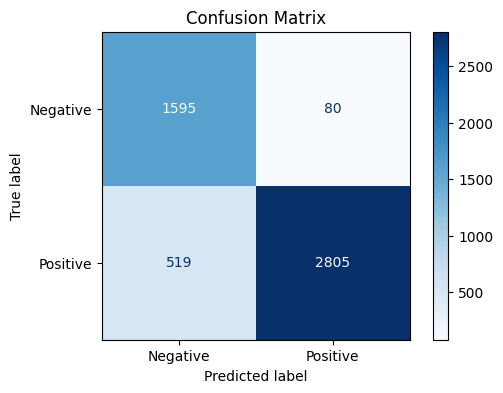

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

ground_truth = df['True'].tolist()
predicted = df['Predicted'].tolist()

# define consufion matrix
confusion_matrix_raw = confusion_matrix(ground_truth, predicted)
print("Confusion Matrix:")
print(confusion_matrix_raw)

# define normalized confusion matrix
confusion_matrix_norm = confusion_matrix(ground_truth, predicted, normalize="all")
print("\nNormalized Confusion Matrix:")
print(confusion_matrix_norm)

print("\n")

fig, ax = plt.subplots(figsize=(6, 4))  # adjust c.m figure size

# visualize c.m with sklearn metrics
# define matrix & create labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_raw, display_labels=["Negative", "Positive"])
# plot c.m
cm_display.plot(cmap=plt.cm.Blues, ax=ax)  # Add colormap for better visual
plt.title("Confusion Matrix")   # title of c.m
plt.show()  # show the plot

### **Seed 5 (Closest Avg to F1) Selected for 60:40 Split**

Confusion Matrix:
[[ 637   33]
 [ 204 1126]]

Normalized Confusion Matrix:
[[0.3185 0.0165]
 [0.102  0.563 ]]




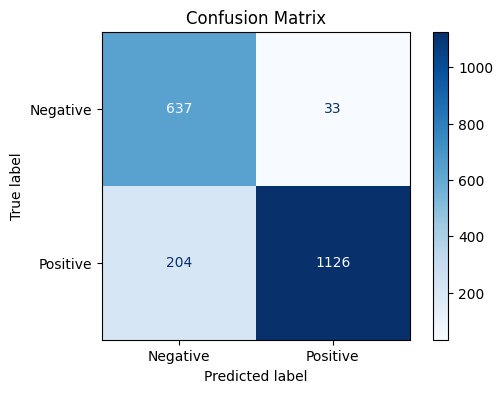

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/model_evaluation_output/60_40_split_seed_5.csv")

ground_truth = df['True'].tolist()
predicted = df['Predicted'].tolist()

# define consufion matrix
confusion_matrix_raw = confusion_matrix(ground_truth, predicted)
print("Confusion Matrix:")
print(confusion_matrix_raw)

# define normalized confusion matrix
confusion_matrix_norm = confusion_matrix(ground_truth, predicted, normalize="all")
print("\nNormalized Confusion Matrix:")
print(confusion_matrix_norm)

print("\n")

fig, ax = plt.subplots(figsize=(6, 4))  # adjust c.m figure size

# visualize c.m with sklearn metrics
# define matrix & create labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_raw, display_labels=["Negative", "Positive"])
# plot c.m
cm_display.plot(cmap=plt.cm.Blues, ax=ax)  # Add colormap for better visual
plt.title("Confusion Matrix")   # title of c.m
plt.show()  # show the plot

### **Seed 6 (Closest Avg to F1) Selected for 70:30 Split**

Confusion Matrix:
[[486  17]
 [153 844]]

Normalized Confusion Matrix:
[[0.324  0.0113]
 [0.102  0.5627]]




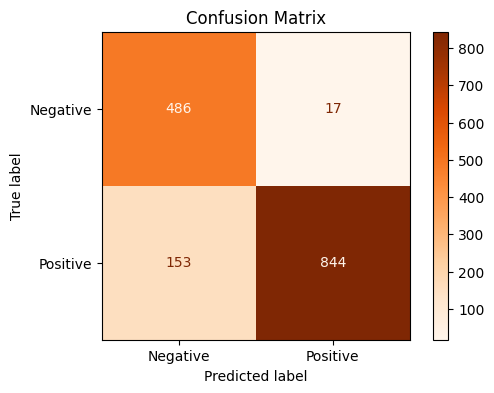

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/model_evaluation_output/70_30_split_seed_6.csv")

ground_truth = df['True'].tolist()
predicted = df['Predicted'].tolist()

# define consufion matrix
confusion_matrix_raw = confusion_matrix(ground_truth, predicted)
print("Confusion Matrix:")
print(confusion_matrix_raw)

np.set_printoptions(precision=4, suppress=True)
# define normalized confusion matrix
confusion_matrix_norm = confusion_matrix(ground_truth, predicted, normalize="all")
print("\nNormalized Confusion Matrix:")
print(confusion_matrix_norm)

print("\n")

fig, ax = plt.subplots(figsize=(6, 4))  # adjust c.m figure size

# visualize c.m with sklearn metrics
# define matrix & create labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_raw, display_labels=["Negative", "Positive"])
# plot c.m
cm_display.plot(cmap=plt.cm.Oranges, ax=ax)  # Add colormap for better visual
plt.title("Confusion Matrix")   # title of c.m
plt.show()  # show the plot

### **Seed 2 (Closest Avg to F1) Selected for 80:20 Split**

Confusion Matrix:
[[317  18]
 [ 98 567]]

Normalized Confusion Matrix:
[[0.317 0.018]
 [0.098 0.567]]




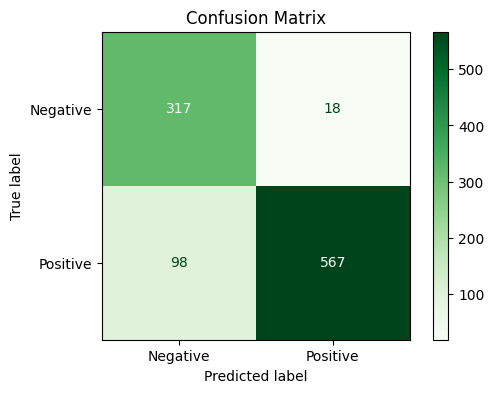

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/model_evaluation_output/80_20_split_seed_2.csv")

ground_truth = df['True'].tolist()
predicted = df['Predicted'].tolist()

# define consufion matrix
confusion_matrix_raw = confusion_matrix(ground_truth, predicted)
print("Confusion Matrix:")
print(confusion_matrix_raw)

# define normalized confusion matrix
confusion_matrix_norm = confusion_matrix(ground_truth, predicted, normalize="all")
print("\nNormalized Confusion Matrix:")
print(confusion_matrix_norm)

print("\n")

fig, ax = plt.subplots(figsize=(6, 4))  # adjust c.m figure size

# visualize c.m with sklearn metrics
# define matrix & create labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_raw, display_labels=["Negative", "Positive"])
# plot c.m
cm_display.plot(cmap=plt.cm.Greens, ax=ax)  # Add colormap for better visual
plt.title("Confusion Matrix")   # title of c.m
plt.show()  # show the plot

### **Streamlit Web Deployment**

In [ ]:
from google.colab import files

#
uploaded = files.upload()
os.rename("SECRET_KEY.env", "/content/.env")

Saving SECRET_KEY.env to SECRET_KEY.env


### **Code app.py**

In [ ]:
%%writefile /content/drive/MyDrive/app.py
import streamlit as st
import openai
import os
import re
import nltk
import contractions
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from dotenv import load_dotenv
# dont use like previous de user.get data, that's only in colab environment

# set nltk data path to gdrive
nltk_data_path = '/content/drive/MyDrive/nltk_data'
os.makedirs(nltk_data_path, exist_ok=True)
# add nlkt path if nt added yet
if nltk_data_path not in nltk.data.path:
  nltk.data.path.append(nltk_data_path)
# download nltk resources if nt yet download)
if not os.path.exists(os.path.join(nltk_data_path, 'tokenizers/punkt')):
  nltk.download('punkt', download_dir=nltk_data_path)
if not os.path.exists(os.path.join(nltk_data_path, 'tokenizers/punkt_tab')):
  nltk.download('punkt_tab', download_dir=nltk_data_path)

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

# load .env file
load_dotenv("/content/.env")
# get API key
api_key = os.getenv("SECRET_KEY")
if not api_key:
    st.error("SECRET_KEY not found in environment variables.")
    st.stop()
# create openai client
client = openai.OpenAI(api_key=api_key)

# func clean user input bfr sending to gpt
def clean_review(text):
  text = contractions.fix(text)
  text = text.lower()                                  # lowercasing
  text = re.sub(r"<.*?>", "", text)                    # remove HTML tags
  text = re.sub(r"[^a-z0-9\s]", "", text)              # keep letters & numbers
  text = re.sub(r"\s+", " ", text).strip()             # collapse multiple spaces
  return text

def tokenization(text):
  return word_tokenize(text)

# stopword removal
# define sentiment-relevant stopwords to retain
stopwords_keywords = {
    'never', 'no', 'not',
    'can', 'could',
    'do', 'does', 'did',
    'was', 'were', 'is', 'are', 'am',
    'very', 'too', 'so', 'really',
    'almost', 'well', 'hardly',
    'quite', 'even', 'just', 'rather',
    'more', 'less', 'most', 'least',
    'always', 'seldom', 'rarely', 'barely',
    'might', 'may', 'would', 'should',
    'only', 'still', 'anymore', 'yet'
}

# customize stopword list (remove the sentiment words from STOP_WORDS)
custom_stopwords = STOP_WORDS - stopwords_keywords

# use spaCy-style stopword removal
def removedStopwords(tokens):
    return [word for word in tokens if word not in custom_stopwords]

# lemmatization
lemmatizer = WordNetLemmatizer()
# map POS tag to wordnet format
def wordnet_pos(tag):
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV,
    }
    return tag_dict.get(tag[0].upper(), wordnet.NOUN)
# lemmatization with POS tagging
def lemmatize_token(tokens):
    tagged = pos_tag(tokens)
    return [lemmatizer.lemmatize(word, wordnet_pos(pos)) for word, pos in tagged]

#
def sentence_reconstruction(tokens):
    return ' '.join(tokens)

# func simulate confidence score based on length/clarity (optional logic)
def simulate_confidence(review):
    length = len(review)
    if length >= 100:
        return 0.95
    elif length >= 50:
        return 0.90
    elif length >= 20:
        return 0.85
    else:
        return 0.80

# streamlit ui
st.title("Review Sentiment Analyzer for Amazon Mobile Electronics")

st.markdown(
    """
    <style>
    body {
        background-color: #e6f2ff;
    }
    </style>
    """,
    unsafe_allow_html=True
)

try:
    st.image("/content/drive/MyDrive/amazon_ecommerce_market.jpg", caption="Amazon E-commerce Image", use_container_width=True)
except Exception as e:
    st.warning(f"Image could not be loaded: {e}")

# instructions to the user
st.write("**Instructions:**")
st.info("Enter a review text and click on the **Analyze Sentiment** button to predict sentiment. ")

st.subheader("Write review text to analyze:")
user_input = st.text_area("Enter your product review here", height=200)

# sentiment analysis when the button is clicked
if st.button('Analyze Sentiment'):
    if user_input.strip() != "":
      with st.spinner("Cleaning text and analyzing sentiment..."):
          try:
                # full preprocessing pipeline
                raw_text = user_input
                cleaned = clean_review(raw_text)
                tokens = tokenization(cleaned)
                tokens = removedStopwords(tokens)
                tokens = lemmatize_token(tokens)
                final_text = sentence_reconstruction(tokens)

                # display cleaned text
                st.subheader("Cleaned Review Text")
                st.info(final_text)

                # send to GPT for sentiment classification
                prompt = f"""Classify the sentiment of this product review as either Positive or Negative:\n\n"{final_text}"\n\nSentiment:"""
                response = client.chat.completions.create(
                    model="gpt-3.5-turbo",
                    messages=[{"role": "user", "content": prompt}],
                    temperature=0,
                    max_tokens=10
                )
                sentiment = response.choices[0].message.content.strip()
                confidence = simulate_confidence(final_text)

                # --- Display prediction ---
                st.subheader("Sentiment Prediction")
                st.success(f"Predicted Sentiment: {sentiment}")
                st.markdown(f"Estimated Confidence Score: **{confidence:.2%}**")

          except Exception as e:
                st.error(f"Error occurred: {str(e)}")
    else:
        st.error("Please enter some review text to analyze.")

Overwriting /content/drive/MyDrive/app.py


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token('2yMek0GxRJvu85BIlElepV61XYc_3eQxPpBw5utG9vppdUdNA')
# kill existing tunnels bfr running again (if >3 times)
ngrok.kill()

!streamlit run /content/drive/MyDrive/app.py &>/content/logs.txt &

# wait few seconds
import time
time.sleep(5)  # wait for Streamlit to start

# expose port 8501 (default Streamlit port), expose streamlit server to internet
public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://174b-34-106-125-28.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!ls /content/drive/MyDrive
!ls /content/drive/MyDrive/Colab\ Notebooks

 amazon_mobile_electronics.csv	       'Colab Notebooks'
 ame_cleaned_dataset.csv	       'Document of MLBB: ROCT 2023'
 ame_converted_munit.csv	        full_dataset_with_gpt_sentiment.csv
 ame_convert_munit.csv		        gpt_cache_v1_80_20.csv
 ame_corrected_misspelling.csv	        gpt_cache_v1_eval_80_20.csv
 ame_expanded.csv		       'Integrated application dev framework'
 ame_no_extra_spaces.csv	       'Intern project'
 ame_removed_html.csv		        model_evaluation_output
 ame_removed_incomplete.csv	        nltk_data
 ame_removed_incomplete_sentences.csv   no_stopword_removed_data_v2.csv
 ame_removed_irrelevant.csv	        @sherlyyy_9393.jpg
 ame_removed_punc.csv		        stopword_removed_data_v1.csv
 ame_removed_symbol.csv		        testdata_gptresults_v1.csv
 ame_replace_currency_sign.csv	        test_data_v1_60_40.csv
 ame_replaced_emoji.csv		        test_data_v1_70_30.csv
 ame_replace_dollar.csv		        test_data_v1_80_20.csv
 ame_replace_emoji.csv		        test_data_v2.csv
 ame_r